In [53]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import tukey_hsd
from sklearn.metrics import r2_score
from scipy.stats import pearsonr



- [Guide for Generating PDFs](https://towardsdatascience.com/how-to-create-pdf-reports-with-python-the-essential-guide-c08dd3ebf2ee)  
- [Dynamic PDF Generation](https://advicement.io/dynamic-documents-api/documentation/getting-started)

### Climate Data

In [28]:
climate = pd.read_csv("Data/2023_scm_climate.csv")
climate = clean_columns(climate)
climate["date"] = pd.to_datetime(climate["date"], format="%m/%d/%y")
climate["week"] = climate["date"].dt.strftime("%U").astype(int)
climate


,record_id,longitude,latitude,elevation,date,rain_inches,min_temp_f,ave_temp_f,max_temp_f,week
0,DEG_DIE_HILL,-76.1495,42.6025,1339,2023-01-01,0.12,36.6,43.8,51.1,1
1,DEG_DIE_HILL,-76.1495,42.6025,1339,2023-01-02,0.00,36.0,38.8,41.5,1
2,DEG_DIE_HILL,-76.1495,42.6025,1339,2023-01-03,0.00,31.5,39.4,47.2,1
3,DEG_DIE_HILL,-76.1495,42.6025,1339,2023-01-04,0.53,36.7,44.9,53.1,1
4,DEG_DIE_HILL,-76.1495,42.6025,1339,2023-01-05,0.35,37.5,46.9,56.2,1
...,...,...,...,...,...,...,...,...,...,...
10131,ZUE_REE,-76.9833,42.7834,669,2023-06-26,0.06,66.3,74.2,82.2,26
10132,ZUE_REE,-76.9833,42.7834,669,2023-06-27,1.24,63.4,72.7,82.1,26
10133,ZUE_REE,-76.9833,42.7834,669,2023-06-28,0.10,60.4,70.2,80.0,26
10134,ZUE_REE,-76.9833,42.7834,669,2023-06-29,0.01,58.7,62.8,66.9,26


### Weekly Climate

In [29]:
weekly_climate = (
    climate[
        ["record_id", "week", "rain_inches", "min_temp_f", "ave_temp_f", "max_temp_f"]
    ]
    .groupby(["record_id", "week"])
    .mean()
)
weekly_climate = weekly_climate.reset_index()
weekly_climate = clean_columns(weekly_climate)
weekly_climate["next_week"] = weekly_climate["week"] + 1
weekly_climate


,record_id,week,rain_inches,min_temp_f,ave_temp_f,max_temp_f,next_week
0,DEG_DIE_HILL,1,0.154286,34.642857,41.114286,47.557143,2
1,DEG_DIE_HILL,2,0.112857,23.842857,29.471429,35.042857,3
2,DEG_DIE_HILL,3,0.177143,22.714286,27.600000,32.457143,4
3,DEG_DIE_HILL,4,0.111429,24.714286,28.757143,32.828571,5
4,DEG_DIE_HILL,5,0.020000,9.642857,18.814286,27.971429,6
...,...,...,...,...,...,...,...
1451,ZUE_REE,22,0.000000,54.914286,68.785714,82.628571,23
1452,ZUE_REE,23,0.024286,50.285714,58.514286,66.771429,24
1453,ZUE_REE,24,0.410000,56.385714,63.528571,70.671429,25
1454,ZUE_REE,25,0.024286,59.000000,67.857143,76.728571,26


### Landscape Data

In [30]:
landscape_500 = pd.read_csv("Landscape/2023_scm_cdl_500m.csv")
landscape_500["Prop_Corn"] = landscape_500["Corn"] / landscape_500["Total"]
landscape_500 = clean_columns(landscape_500).drop("unnamed_0", axis=1)
landscape_500


,site_id,corn,open_water,sweet_corn,developed_open_space,developed_low_intensity,developed_med_intensity,developed_high_intensity,barren,deciduous_forest,...,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,prop_corn
0,POV_DUN,6,0,0,62,11,0,0,0,230,...,0.009510,3,0.002195,289,0.211412,0,0.000000,0.0,0.0,0.004389
1,DIP_FLE,386,0,0,21,22,5,0,0,135,...,0.365764,1,0.000732,146,0.106803,0,0.000000,0.0,0.0,0.282370
2,DIP_CUR,292,0,0,55,21,3,0,0,87,...,0.338203,0,0.000000,140,0.102264,0,0.000000,0.0,0.0,0.213294
3,GAB_STE,136,0,0,14,19,12,5,3,195,...,0.144217,3,0.002196,113,0.082723,3,0.002196,0.0,0.0,0.099561
4,MIL_YOD_1,158,0,0,0,0,0,0,0,331,...,0.326754,1,0.000731,53,0.038743,0,0.000000,0.0,0.0,0.115497
5,MIL_CHA_1,430,0,0,67,10,9,0,0,50,...,0.475842,1,0.000732,67,0.049048,0,0.000000,0.0,0.0,0.314788
6,MIL_MCC_1,293,0,0,3,1,0,0,0,193,...,0.368960,0,0.000000,37,0.027086,0,0.000000,0.0,0.0,0.214495
7,KAT_SAU_1,152,0,0,28,7,4,1,0,205,...,0.203650,0,0.000000,93,0.067883,0,0.000000,0.0,0.0,0.110949
8,KAT_SAU_2,172,0,0,54,7,3,0,0,67,...,0.141082,1,0.000731,132,0.096491,0,0.000000,0.0,0.0,0.125731
9,KAT_TEE_1,201,0,0,54,11,5,0,0,282,...,0.158279,0,0.000000,114,0.083151,0,0.000000,0.0,0.0,0.146608


In [31]:
landscape_1000 = pd.read_csv("Landscape/2023_scm_cdl_1000m.csv")
landscape_1000["Prop_Corn"] = landscape_1000["Corn"] / landscape_1000["Total"]
landscape_1000 = clean_columns(landscape_1000).drop("unnamed_0", axis=1)
landscape_1000


,site_id,corn,open_water,sweet_corn,developed_open_space,developed_low_intensity,developed_med_intensity,developed_high_intensity,barren,deciduous_forest,...,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,prop_corn
0,POV_DUN,10,4,0,317,105,26,5,6,972,...,0.018784,14,0.003131,915,0.204606,6,0.001342,0.0,0.0,0.002236
1,DIP_FLE,1080,2,14,45,82,12,3,0,442,...,0.468414,3,0.000672,402,0.090054,0,0.000000,0.0,0.0,0.241935
2,DIP_CUR,1205,0,0,149,66,35,18,2,488,...,0.403988,6,0.001344,484,0.108447,2,0.000448,0.0,0.0,0.269998
3,GAB_STE,359,0,0,42,39,16,5,18,1321,...,0.151814,22,0.004926,413,0.092476,18,0.004030,0.0,0.0,0.080385
4,MIL_YOD_1,745,0,0,131,17,6,1,1,953,...,0.349473,4,0.000897,627,0.140551,1,0.000224,0.0,0.0,0.167003
5,MIL_CHA_1,1480,0,1,151,21,22,1,0,534,...,0.521505,1,0.000224,321,0.071909,0,0.000000,0.0,0.0,0.331541
6,MIL_MCC_1,891,0,0,127,17,3,0,0,700,...,0.379789,2,0.000448,420,0.094107,0,0.000000,0.0,0.0,0.199641
7,KAT_SAU_1,340,0,0,213,33,7,3,1,1155,...,0.113524,2,0.000448,481,0.107703,1,0.000224,0.0,0.0,0.076131
8,KAT_SAU_2,632,1,0,253,33,12,2,1,699,...,0.165062,2,0.000448,572,0.128108,1,0.000224,0.0,0.0,0.141545
9,KAT_TEE_1,565,11,0,183,44,17,1,0,1084,...,0.148869,0,0.000000,605,0.135438,0,0.000000,0.0,0.0,0.126483


In [32]:
landscape_2000 = pd.read_csv("Landscape/2023_scm_cdl_2000m.csv")
landscape_2000["Prop_Corn"] = landscape_2000["Corn"] / landscape_2000["Total"]
landscape_2000 = clean_columns(landscape_2000).drop("unnamed_0", axis=1)
landscape_2000


,site_id,corn,open_water,sweet_corn,developed_open_space,developed_low_intensity,developed_med_intensity,developed_high_intensity,barren,deciduous_forest,...,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,prop_corn
0,POV_DUN,88,78,2,1218,407,94,21,123,3831,...,0.032158,153,0.009648,3407,0.214831,123,0.007756,0.0,0.0,0.005549
1,DIP_FLE,3139,3,32,379,543,90,9,5,3040,...,0.358790,24,0.001512,1581,0.099622,5,0.000315,0.0,0.0,0.197795
2,DIP_CUR,3123,3,2,640,282,91,63,6,3298,...,0.261459,30,0.001891,2735,0.172436,6,0.000378,0.0,0.0,0.196898
3,GAB_STE,1697,147,4,209,243,127,18,39,4855,...,0.182580,52,0.003277,2556,0.161089,39,0.002458,0.0,0.0,0.106952
4,MIL_YOD_1,2028,2,0,526,97,45,5,3,3858,...,0.314264,17,0.001071,2828,0.178175,3,0.000189,0.0,0.0,0.127772
5,MIL_CHA_1,4277,0,2,572,118,61,8,4,3123,...,0.475455,10,0.000630,1405,0.088537,4,0.000252,0.0,0.0,0.269519
6,MIL_MCC_1,2122,32,0,691,546,294,58,5,3019,...,0.296710,18,0.001135,2356,0.148512,5,0.000315,0.0,0.0,0.133762
7,KAT_SAU_1,1178,1,0,719,67,22,5,1,5814,...,0.091861,7,0.000441,1869,0.117836,1,0.000063,0.0,0.0,0.074270
8,KAT_SAU_2,1894,1,2,722,73,31,5,2,4581,...,0.144568,12,0.000757,2242,0.141353,2,0.000126,0.0,0.0,0.119412
9,KAT_TEE_1,1027,12,0,539,85,48,4,0,6324,...,0.091734,1,0.000063,1520,0.095833,0,0.000000,0.0,0.0,0.064750


### Soil

In [33]:
soil = pd.read_csv("Data/2023_scm_soil.csv")
soil = clean_columns(soil)
soil


,record_id,ny_soils_0,ny_soils_01,muid,hsg,hsgint,muserial,hsga,hsgb,hsgc,hsgd,hsgw
0,POV_DUN,2404,4346,NY134,A,1,6801,58,27,0,15,0
1,DIP_FLE,2190,4201,NY131,A,1,6798,0,14,63,23,0
2,DIP_CUR,2085,5669,NY134,A,1,6801,58,27,0,15,0
3,GAB_STE,1376,5311,NY084,A,1,6752,62,23,13,2,0
4,SMI_CRO,1779,5454,NY131,A,1,6798,0,14,63,23,0
5,SMI_CAN,1511,5436,NY128,B,2,6795,0,90,6,4,0
6,SMI_KEL,1659,5444,NY007,C,3,6681,0,40,48,12,0
7,SMI_COB,2029,3921,NY099,A,1,6767,54,28,6,12,0
8,SMI_DOU,1349,3760,NY007,C,3,6681,0,40,48,12,0
9,SMI_MCC,1401,3769,NY142,D,4,6809,0,34,31,35,0


### Management

In [34]:
management = pd.read_csv("Data/2023_management.csv")
management = clean_columns(management)
management


,field_id,previous_crop,cover_crop,manure
0,POV_DUN,Silage Corn,No,No
1,DIP_FLE,Silage Corn,Yes,No
2,DIP_CUR,Silage Corn,Yes,No
3,GAB_STE,Silage Corn,No,Yes
4,SMI_CRO,Grain Corn,No,No
5,SMI_CAN,Silage Corn,No,Yes
6,SMI_KEL,Silage Corn,Yes,Yes
7,SMI_COB,Silage Corn,Yes,No
8,SMI_DOU,Soybean,No,Yes
9,SMI_MCC,Soybean,No,No


In [35]:
management.groupby('cover_crop').count()['field_id']

cover_crop
No         28
Partial     2
Yes        24
Name: field_id, dtype: int64

In [36]:
management.groupby('manure').count()['field_id']

manure
No     20
Yes    31
Name: field_id, dtype: int64

In [37]:
management.groupby('previous_crop').count()['field_id']

previous_crop
Grain Corn                                 5
Mixed Veg                                  1
Silage Corn                               34
Silage Corn Strip Cropped With Alfalfa     1
Soybean                                    6
Sweet Corn                                 2
Wheat                                      2
Name: field_id, dtype: int64

### Planting Date

In [38]:
planting_date = pd.read_csv("Data/2023_scm_planting_dates.csv")
planting_date = clean_columns(planting_date)
planting_date["planting_date"] = pd.to_datetime(
    planting_date["planting_date"], format="%m/%d/%y"
)
planting_date = planting_date.drop_duplicates("field_id")
planting_date["start_week"] = planting_date["planting_date"] - pd.Timedelta(7, unit="d")
planting_date


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_77096/3314138927.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planting_date["start_week"] = planting_date["planting_date"] - pd.Timedelta(7, unit="d")


,field_id,planting_date,start_week
0,LET_TAB,2023-05-07,2023-04-30
2,GAB_ALL,2023-05-09,2023-05-02
4,SMI_CRO,2023-05-09,2023-05-02
6,SMI_DOU,2023-05-10,2023-05-03
8,DEG_PER_STRIP,2023-05-10,2023-05-03
10,DIP_PAT,2023-05-11,2023-05-04
12,KAT_TEE_2,2023-05-11,2023-05-04
16,KAT_TEE,2023-05-13,2023-05-06
18,SMI_COB,2023-05-13,2023-05-06
20,SMI_JOH,2023-05-13,2023-05-06


Average climate data for the week leading up to planting date, per site. 

In [39]:
planting_temps = climate.merge(
    planting_date, left_on=["record_id"], right_on=["field_id"], how="left"
)
planting_temps = planting_temps.dropna()
planting_temps = planting_temps.loc[
    (planting_temps["date"] >= planting_temps["start_week"])
    & (planting_temps["date"] <= planting_temps["planting_date"])
]
planting_temps = planting_temps.drop(
    ["date", "week", "start_week", "longitude", "latitude", "elevation", "field_id"],
    axis=1,
)
planting_temps = planting_temps.groupby("record_id").mean()
# planting_temps.to_csv('Data/planting_date_climate.csv')
planting_temps


,rain_inches,min_temp_f,ave_temp_f,max_temp_f,planting_date
record_id,,,,,
DEG_FOU_WOOD,0.00000,36.7500,51.4625,66.1625,2023-05-18
DEG_PER_STRIP,0.08750,36.3250,46.5125,56.7250,2023-05-10
DEG_VIL,0.03375,39.4375,52.8500,66.2750,2023-05-15
DIP_CUR,0.00000,38.1875,51.7500,65.3000,2023-05-19
DIP_FLE,0.02875,41.7250,54.2750,66.7875,2023-05-23
DIP_PAT,0.04625,39.9625,50.8250,61.7000,2023-05-11
GAB_ALL,0.05000,43.2750,53.5625,63.8500,2023-05-09
GAB_STE,0.03125,43.7000,56.3750,69.0750,2023-05-23
KAT_BAR,0.02125,37.9125,53.3875,68.8625,2023-05-22


Average climate data for the week leading up to planting date, across all sites. 

In [40]:
planting_temps.mean(numeric_only=True)


rain_inches     0.028468
min_temp_f     40.874597
ave_temp_f     53.856855
max_temp_f     66.839113
dtype: float64

Average climate data for the week leading up to planting date, per site for early planting dates (before 5/15).

In [41]:
early_planting_temps = planting_temps.loc[
    planting_temps["planting_date"] <= "2023-05-15"
]
early_planting_temps


,rain_inches,min_temp_f,ave_temp_f,max_temp_f,planting_date
record_id,,,,,
DEG_PER_STRIP,0.08750,36.3250,46.5125,56.7250,2023-05-10
DEG_VIL,0.03375,39.4375,52.8500,66.2750,2023-05-15
DIP_PAT,0.04625,39.9625,50.8250,61.7000,2023-05-11
GAB_ALL,0.05000,43.2750,53.5625,63.8500,2023-05-09
KAT_TEE,0.01000,39.6375,54.0000,68.3250,2023-05-13
KAT_TEE_2,0.03750,37.1750,48.9375,60.6750,2023-05-11
LET_TAB,0.14500,37.1750,45.7375,54.3375,2023-05-07
ONE_STA,0.00750,42.2000,56.2500,70.3125,2023-05-15
SEA_HOO,0.02125,45.8875,57.6125,69.3000,2023-05-15


Average climate data for the week leading up to planting date, across all sites for early planting dates (before 5/15).

In [42]:
early_planting_temps.mean(numeric_only=True)


rain_inches     0.044609
min_temp_f     40.720312
ave_temp_f     52.632031
max_temp_f     64.550000
dtype: float64

In [43]:
early_planting_temps["range"] = (
    early_planting_temps["max_temp_f"] - early_planting_temps["min_temp_f"]
)
early_planting_temps


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_77096/3552099968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_planting_temps["range"] = (


,rain_inches,min_temp_f,ave_temp_f,max_temp_f,planting_date,range
record_id,,,,,,
DEG_PER_STRIP,0.08750,36.3250,46.5125,56.7250,2023-05-10,20.4000
DEG_VIL,0.03375,39.4375,52.8500,66.2750,2023-05-15,26.8375
DIP_PAT,0.04625,39.9625,50.8250,61.7000,2023-05-11,21.7375
GAB_ALL,0.05000,43.2750,53.5625,63.8500,2023-05-09,20.5750
KAT_TEE,0.01000,39.6375,54.0000,68.3250,2023-05-13,28.6875
KAT_TEE_2,0.03750,37.1750,48.9375,60.6750,2023-05-11,23.5000
LET_TAB,0.14500,37.1750,45.7375,54.3375,2023-05-07,17.1625
ONE_STA,0.00750,42.2000,56.2500,70.3125,2023-05-15,28.1125
SEA_HOO,0.02125,45.8875,57.6125,69.3000,2023-05-15,23.4125


In [44]:
np.mean(early_planting_temps["range"])


23.829687500000006

### Adult Abundance Count Data

In [2]:
scm_counts = pd.read_csv("Data/2023_scm_counts.csv")
scm_counts = clean_columns(scm_counts)
scm_counts["date"] = pd.to_datetime(scm_counts["date"], format="%m/%d/%y")
scm_counts["week"] = scm_counts["date"].dt.strftime("%U").astype(int)
scm_counts = scm_counts.drop(['initials', 'notes'], axis=1)
#scm_counts = scm_counts.dropna()
scm_counts

,card_id,data_collector,site,date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,week
0,2245,Janice Degni,DEG_DIE_HILL,2023-04-21,NaN,NaN,NaN,NaN,NaN,NaN,16
1,2246,Janice Degni,DEG_DIE_HILL,2023-04-21,16.0,10.0,7.0,5.0,0.0,0.0,16
2,2265,Janice Degni,DEG_DIE_HILL,2023-04-27,NaN,NaN,NaN,NaN,NaN,NaN,17
3,2266,Janice Degni,DEG_DIE_HILL,2023-04-27,43.0,9.0,51.0,12.0,0.0,0.0,17
4,2373,Janice Degni,DEG_DIE_HILL,2023-05-04,NaN,NaN,NaN,NaN,NaN,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...
573,2384,Marion Zuefle,ZUE_REE,2023-05-02,NaN,NaN,NaN,NaN,NaN,NaN,18
574,2417,Marion Zuefle,ZUE_REE,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,19
575,2418,Marion Zuefle,ZUE_REE,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,19
576,2551,Marion Zuefle,ZUE_REE,2023-05-17,NaN,NaN,NaN,NaN,NaN,NaN,20


### GDD Data

In [46]:
gdd = pd.read_csv("Data/2023_scm_gdd.csv")
gdd = clean_columns(gdd)
gdd["date"] = pd.to_datetime(gdd["date"], format="%m/%d/%y")
gdd["week"] = gdd["date"].dt.strftime("%U").astype(int)
gdd


,record_id,date,temp_max_f,temp_min_f,temp_mean_f,gdd_fahrenheit_simple,gdd_fahrenheit_sine,gdd_fahrenheit_simple_cumsum,gdd_fahrenheit_sine_cum_sum,temp_max_c,temp_min_c,temp_mean_c,gdd_celsius_simple,gdd_celsius_sine,gdd_celsius_simple_cum_sum,gdd_celsius_sine_cum_sum,week
0,DEG_DIE_HILL,2023-01-01,51,37,44.0,5.0,5.327068,5.0,5.327068,10.555556,2.777778,6.666667,2.777778,2.959482,2.777778,2.959482,1
1,DEG_DIE_HILL,2023-01-02,42,36,39.0,0.0,0.955414,5.0,6.282482,5.555556,2.222222,3.888889,0.000000,0.530786,2.777778,3.490268,1
2,DEG_DIE_HILL,2023-01-03,47,32,39.5,0.5,2.643845,5.5,8.926327,8.333333,0.000000,4.166667,0.277778,1.468803,3.055556,4.959071,1
3,DEG_DIE_HILL,2023-01-04,53,37,45.0,6.0,6.305693,11.5,15.232020,11.666667,2.777778,7.222222,3.333333,3.503163,6.388889,8.462233,1
4,DEG_DIE_HILL,2023-01-05,56,38,47.0,8.0,8.102681,19.5,23.334701,13.333333,3.333333,8.333333,4.444444,4.501489,10.833333,12.963723,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,ZUE_REE,2023-06-26,82,66,74.0,35.0,35.000000,1589.5,1666.019274,27.777778,18.888889,23.333333,19.444444,19.444444,883.055556,925.566263,26
10132,ZUE_REE,2023-06-27,82,63,72.5,33.5,33.500000,1623.0,1699.519274,27.777778,17.222222,22.500000,18.611111,18.611111,901.666667,944.177374,26
10133,ZUE_REE,2023-06-28,80,60,70.0,31.0,31.000000,1654.0,1730.519274,26.666667,15.555556,21.111111,17.222222,17.222222,918.888889,961.399597,26
10134,ZUE_REE,2023-06-29,67,59,63.0,24.0,24.000000,1678.0,1754.519274,19.444444,15.000000,17.222222,13.333333,13.333333,932.222222,974.732930,26


### Germination Data

In [25]:
germination = pd.read_csv('Data/2023_germination.csv')
germination = clean_columns(germination)
germination

,container_nr,date_collected,seed_type,date_1st_measure,nr_seeds_germinated_1st_measure,date_2nd_measure,nr_seeds_germinated_2nd_measure,nr_seeds_with_root_only,nr_seeds_with_shoot_only,nr_seeds_with_both_root_and_shoot,nr_seeds_not_germinated,dry_aboveground_biomass_of_seedlings,dry_belowground_biomass_of_seedlings
0,3013,4/18/23,corn,4/19/23,5,4/27/23,7.0,0.0,0.0,7.0,3.0,NaN,NaN
1,3014,4/18/23,lima,4/19/23,0,4/27/23,0.0,0.0,0.0,0.0,10.0,NaN,NaN
2,3015,4/18/23,lima,4/19/23,0,4/27/23,0.0,0.0,0.0,0.0,10.0,NaN,NaN
3,3016,4/18/23,corn,4/19/23,8,4/27/23,10.0,0.0,0.0,10.0,0.0,NaN,NaN
4,3017,4/18/23,corn,4/19/23,6,4/27/23,6.0,0.0,1.0,5.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5138,6/27/23,corn,7/3/23,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,4783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.51086,0.74461
298,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53330,0.07336
299,4043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.54062,0.35735


### Wire Mesh Data (Risk)

In [3]:
wire_mesh = pd.read_csv("Data/2023_wire_mesh.csv")
wire_mesh = clean_columns(wire_mesh)
wire_mesh["number_wireworm"] = (
    wire_mesh["number_wireworm"].replace(">10", 10).astype(float)
)
wire_mesh["total_phorid_maggots"] = (
    wire_mesh["total_phorid_maggots"].replace(">10", 10).astype(float)
)
wire_mesh["total_phorid_pupae"] = (
    wire_mesh["total_phorid_pupae"].replace(">10", 10).astype(float)
)

wire_mesh = wire_mesh.loc[wire_mesh['project'] == 'R']

wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,notes
4503,1,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,1.0,1.0,1.0,NaN
4504,2,3011,R,Loose,NaN,NaN,NaN,0.0,0,0.0,NaN,1.0,2.0,NaN
4505,3,3011,R,Total,8.0,1.0,2.0,1.0,2,0.0,1.0,2.0,3.0,NaN
4506,4,3009,R,Corn,10.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,NaN
4507,5,3009,R,Loose,NaN,NaN,NaN,0.0,0,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5344,5432,5110,R,Loose,NaN,NaN,NaN,0.0,0,1.0,NaN,0.0,0.0,NaN
5345,5433,5110,R,Total,10.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,NaN
5346,5434,5112,R,Bean,10.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN
5347,5435,5112,R,Loose,NaN,NaN,NaN,0.0,0,0.0,NaN,0.0,0.0,NaN


### Wire Mesh Intake

Contains mapping for container ID and field ID. 

In [4]:
wire_mesh_intake = pd.read_csv("Data/2023_wire_mesh_intake.csv")
wire_mesh_intake = clean_columns(wire_mesh_intake)
wire_mesh_intake = wire_mesh_intake.loc[wire_mesh_intake["project"] == "R"]
wire_mesh_intake


,container_number,container_type,project,record_id,collection_date,notes
1525,3003,deli cup,R,DIP_CUR,4/18/23,NaN
1526,3004,deli cup,R,DIP_CUR,4/18/23,NaN
1527,3015,sushi container,R,DIP_CUR,4/18/23,NaN
1528,3016,sushi container,R,DIP_CUR,4/18/23,NaN
1529,3229,sushi container,R,DIP_CUR,5/2/23,NaN
...,...,...,...,...,...,...
2106,3670,deli cup,R,ZUE_REE,5/9/23,NaN
2107,4279,sushi container,R,ZUE_REE,5/23/23,NaN
2108,4280,sushi container,R,ZUE_REE,5/23/23,NaN
2109,4281,deli cup,R,ZUE_REE,5/25/23,NaN


In [5]:
wire_mesh = wire_mesh.merge(
    wire_mesh_intake[
        ["container_number", "container_type", "collection_date", "record_id", 'project']
    ],
    on=["container_number", 'project'],
    how="left",
)
wire_mesh


,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,notes,container_type,collection_date,record_id
0,1,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,1.0,1.0,1.0,NaN,deli cup,4/17/23,GAB_ALL
1,2,3011,R,Loose,NaN,NaN,NaN,0.0,0,0.0,NaN,1.0,2.0,NaN,deli cup,4/17/23,GAB_ALL
2,3,3011,R,Total,8.0,1.0,2.0,1.0,2,0.0,1.0,2.0,3.0,NaN,deli cup,4/17/23,GAB_ALL
3,4,3009,R,Corn,10.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,4/17/23,GAB_STE
4,5,3009,R,Loose,NaN,NaN,NaN,0.0,0,0.0,NaN,0.0,0.0,NaN,deli cup,4/17/23,GAB_STE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,5432,5110,R,Loose,NaN,NaN,NaN,0.0,0,1.0,NaN,0.0,0.0,NaN,deli cup,6/12/23,SMI_CAN
842,5433,5110,R,Total,10.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,NaN,deli cup,6/12/23,SMI_CAN
843,5434,5112,R,Bean,10.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,6/14/23,SMI_HOF
844,5435,5112,R,Loose,NaN,NaN,NaN,0.0,0,0.0,NaN,0.0,0.0,NaN,deli cup,6/14/23,SMI_HOF


In [6]:
bean_containers = wire_mesh[wire_mesh["seed_type"] == "Bean"]
bean_containers = bean_containers["container_number"]
bean_containers


0      3011
6      3068
12     3010
18     3003
27     3042
       ... 
807    5117
813    5098
834    5034
837    4214
843    5112
Name: container_number, Length: 136, dtype: int64

In [7]:
corn_containers = wire_mesh[wire_mesh["seed_type"] == "Corn"]
corn_containers = corn_containers["container_number"]
corn_containers


3      3009
9      3067
15     3012
21     3005
24     3004
       ... 
822    5100
825    5114
828    5116
831    5033
840    5110
Name: container_number, Length: 146, dtype: int64

In [8]:
bean_data = wire_mesh[wire_mesh["container_number"].isin(bean_containers)]
bean_data = wire_mesh.loc[wire_mesh["seed_type"] == "Total"]
bean_data.loc[:, "seed_type"] = "Bean"
bean_data


,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,notes,container_type,collection_date,record_id
2,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,1.0,2.0,3.0,NaN,deli cup,4/17/23,GAB_ALL
5,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,4/17/23,GAB_STE
8,9,3068,R,Bean,8.0,0.0,0.0,0.0,5,1.0,2.0,7.0,9.0,NaN,deli cup,4/18/23,SMI_JOH_2
11,12,3067,R,Bean,10.0,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,4/18/23,SMI_JOH_2
14,15,3010,R,Bean,10.0,0.0,1.0,0.0,0,0.0,0.0,0.0,19.0,NaN,deli cup,4/17/23,GAB_STE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,5184,5033,R,Bean,10.0,0.0,3.0,0.0,0,0.0,0.0,0.0,1.0,NaN,deli cup,6/6/23,DIP_FLE
836,5229,5034,R,Bean,10.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,6/6/23,DIP_FLE
839,5403,4214,R,Bean,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,5/19/23,WIS_KEN
842,5433,5110,R,Bean,10.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,NaN,deli cup,6/12/23,SMI_CAN


In [9]:
corn_data = wire_mesh[wire_mesh["container_number"].isin(corn_containers)]
corn_data = wire_mesh.loc[wire_mesh["seed_type"] == "Total"]
corn_data.loc[:, "seed_type"] = "Corn"
corn_data


,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,notes,container_type,collection_date,record_id
2,3,3011,R,Corn,8.0,1.0,2.0,1.0,2,0.0,1.0,2.0,3.0,NaN,deli cup,4/17/23,GAB_ALL
5,6,3009,R,Corn,10.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,4/17/23,GAB_STE
8,9,3068,R,Corn,8.0,0.0,0.0,0.0,5,1.0,2.0,7.0,9.0,NaN,deli cup,4/18/23,SMI_JOH_2
11,12,3067,R,Corn,10.0,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,4/18/23,SMI_JOH_2
14,15,3010,R,Corn,10.0,0.0,1.0,0.0,0,0.0,0.0,0.0,19.0,NaN,deli cup,4/17/23,GAB_STE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,0.0,0.0,1.0,NaN,deli cup,6/6/23,DIP_FLE
836,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,6/6/23,DIP_FLE
839,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,5/19/23,WIS_KEN
842,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,NaN,deli cup,6/12/23,SMI_CAN


In [10]:
wire_mesh = pd.concat([bean_data, corn_data], axis=0)
wire_mesh = wire_mesh.loc[wire_mesh["project"] == "R"]
wire_mesh["collection_date"] = pd.to_datetime(
    wire_mesh["collection_date"], format="%m/%d/%y"
)
wire_mesh


,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,notes,container_type,collection_date,record_id
2,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,1.0,2.0,3.0,NaN,deli cup,2023-04-17,GAB_ALL
5,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-04-17,GAB_STE
8,9,3068,R,Bean,8.0,0.0,0.0,0.0,5,1.0,2.0,7.0,9.0,NaN,deli cup,2023-04-18,SMI_JOH_2
11,12,3067,R,Bean,10.0,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-04-18,SMI_JOH_2
14,15,3010,R,Bean,10.0,0.0,1.0,0.0,0,0.0,0.0,0.0,19.0,NaN,deli cup,2023-04-17,GAB_STE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,0.0,0.0,1.0,NaN,deli cup,2023-06-06,DIP_FLE
836,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-06-06,DIP_FLE
839,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-05-19,WIS_KEN
842,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,NaN,deli cup,2023-06-12,SMI_CAN


In [11]:
wire_mesh = wire_mesh.merge(
    management, left_on="record_id", right_on="field_id", how="left"
)
wire_mesh


NameError: name 'management' is not defined

In [19]:
wire_mesh = wire_mesh.merge(soil, on="record_id", how="left")
wire_mesh


KeyError: 'record_id'

In [20]:
wire_mesh["one_week"] = wire_mesh["collection_date"] - pd.Timedelta(7, unit="d")
wire_mesh["two_weeks"] = wire_mesh["collection_date"] - pd.Timedelta(14, unit="d")
wire_mesh


KeyError: 'collection_date'

In [100]:
df = climate.merge(
    wire_mesh, left_on=["record_id"], right_on=["record_id"], how="left"
)[
    [
        "record_id",
        "date",
        "rain_inches",
        "min_temp_f",
        "ave_temp_f",
        "max_temp_f",
        "one_week",
        "two_weeks",
        "collection_date",
        'week'
    ]
]
df = df.dropna()
df = df.loc[(df['date'] >= df['one_week']) & (df['date'] <= df['collection_date'])].groupby(['record_id', 'collection_date'], as_index = False).mean(['rain_inches', 'min_temp_f', 'ave_temp_f', 'max_temp_f'])
df = df.rename(columns={"rain_inches": "rain_inches_one_week", "min_temp_f": "min_temp_f_one_week", "ave_temp_f": "ave_temp_f_one_week", "max_temp_f": "max_temp_f_one_week"})
df = df.drop(columns='week')
df

,record_id,collection_date,rain_inches_one_week,min_temp_f_one_week,ave_temp_f_one_week,max_temp_f_one_week
0,DIP_CUR,2023-04-18,0.09125,43.3125,57.0125,70.7500
1,DIP_CUR,2023-05-02,0.40000,36.7750,43.8125,50.8375
2,DIP_CUR,2023-05-16,0.00000,39.3625,52.4125,65.4500
3,DIP_CUR,2023-05-19,0.00000,38.1875,51.7500,65.3000
4,DIP_CUR,2023-06-02,0.00000,46.1000,60.9625,75.8250
...,...,...,...,...,...,...
140,WIS_MEG,2023-05-17,0.00000,44.4000,60.3625,76.3500
141,WIS_MEG,2023-06-02,0.00000,46.4375,62.9375,79.4875
142,ZUE_REE,2023-04-26,0.14375,38.5750,47.5625,56.5125
143,ZUE_REE,2023-05-09,0.09500,40.1125,48.7250,57.3250


In [101]:
wire_mesh = wire_mesh.merge(df, left_on=['record_id', 'collection_date'], right_on=['record_id', 'collection_date'], how='left')
wire_mesh


,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,hsgb,hsgc,hsgd,hsgw,one_week,two_weeks,rain_inches_one_week,min_temp_f_one_week,ave_temp_f_one_week,max_temp_f_one_week
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,11.0,63.0,26.0,0.0,2023-04-10,2023-04-03,0.01000,48.5000,62.6875,76.9000
1,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,23.0,13.0,2.0,0.0,2023-04-10,2023-04-03,0.00250,47.0250,61.6500,76.2875
2,9,3068,R,Bean,8.0,0.0,0.0,0.0,5,1.0,...,34.0,31.0,35.0,0.0,2023-04-11,2023-04-04,0.04750,46.8125,61.1000,75.3875
3,12,3067,R,Bean,10.0,0.0,3.0,0.0,0,0.0,...,34.0,31.0,35.0,0.0,2023-04-11,2023-04-04,0.04750,46.8125,61.1000,75.3875
4,15,3010,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,23.0,13.0,2.0,0.0,2023-04-10,2023-04-03,0.00250,47.0250,61.6500,76.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,14.0,63.0,23.0,0.0,2023-05-30,2023-05-23,0.00625,52.2875,65.9875,79.6875
560,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,14.0,63.0,23.0,0.0,2023-05-30,2023-05-23,0.00625,52.2875,65.9875,79.6875
561,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,0.0,90.0,4.0,0.0,2023-05-12,2023-05-05,0.00000,45.1250,59.8250,74.4750
562,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,90.0,6.0,4.0,0.0,2023-06-05,2023-05-29,0.05375,44.0000,54.3250,64.6625


In [102]:
df = climate.merge(
    wire_mesh, left_on=["record_id"], right_on=["record_id"], how="left"
)[
    [
        "record_id",
        "date",
        "rain_inches",
        "min_temp_f",
        "ave_temp_f",
        "max_temp_f",
        "one_week",
        "two_weeks",
        "collection_date",
    ]
]
df = df.dropna()
df = df.loc[(df['date'] >= df['two_weeks']) & (df['date'] <= df['collection_date'])].groupby(['record_id', 'collection_date'], as_index = False).mean(['rain_inches', 'min_temp_f', 'ave_temp_f', 'max_temp_f'])
df = df.rename(columns={"rain_inches": "rain_inches_two_weeks", "min_temp_f": "min_temp_f_two_weeks", "ave_temp_f": "ave_temp_f_two_weeks", "max_temp_f": "max_temp_f_two_weeks"})
df

,record_id,collection_date,rain_inches_two_weeks,min_temp_f_two_weeks,ave_temp_f_two_weeks,max_temp_f_two_weeks
0,DIP_CUR,2023-04-18,0.120000,38.533333,50.920000,63.313333
1,DIP_CUR,2023-05-02,0.248667,37.460000,45.720000,54.000000
2,DIP_CUR,2023-05-16,0.034667,38.733333,49.573333,60.380000
3,DIP_CUR,2023-05-19,0.012000,37.853333,50.400000,62.926667
4,DIP_CUR,2023-06-02,0.006000,44.893333,58.526667,72.200000
...,...,...,...,...,...,...
140,WIS_MEG,2023-05-17,0.072000,43.346667,57.253333,71.186667
141,WIS_MEG,2023-06-02,0.040667,45.520000,60.560000,75.620000
142,ZUE_REE,2023-04-26,0.102667,43.733333,54.706667,65.686667
143,ZUE_REE,2023-05-09,0.166000,39.306667,47.486667,55.633333


In [103]:
wire_mesh = wire_mesh.merge(df, left_on=['record_id', 'collection_date'], right_on=['record_id', 'collection_date'], how='left')
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,one_week,two_weeks,rain_inches_one_week,min_temp_f_one_week,ave_temp_f_one_week,max_temp_f_one_week,rain_inches_two_weeks,min_temp_f_two_weeks,ave_temp_f_two_weeks,max_temp_f_two_weeks
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,2023-04-10,2023-04-03,0.01000,48.5000,62.6875,76.9000,0.036000,42.300000,54.346667,66.400000
1,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,2023-04-10,2023-04-03,0.00250,47.0250,61.6500,76.2875,0.039333,40.573333,53.080000,65.600000
2,9,3068,R,Bean,8.0,0.0,0.0,0.0,5,1.0,...,2023-04-11,2023-04-04,0.04750,46.8125,61.1000,75.3875,0.118000,40.886667,53.466667,66.046667
3,12,3067,R,Bean,10.0,0.0,3.0,0.0,0,0.0,...,2023-04-11,2023-04-04,0.04750,46.8125,61.1000,75.3875,0.118000,40.886667,53.466667,66.046667
4,15,3010,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,2023-04-10,2023-04-03,0.00250,47.0250,61.6500,76.2875,0.039333,40.573333,53.080000,65.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,2023-05-30,2023-05-23,0.00625,52.2875,65.9875,79.6875,0.003333,47.646667,61.553333,75.466667
560,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,2023-05-30,2023-05-23,0.00625,52.2875,65.9875,79.6875,0.003333,47.646667,61.553333,75.466667
561,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,2023-05-12,2023-05-05,0.00000,45.1250,59.8250,74.4750,0.008667,43.980000,58.086667,72.160000
562,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,2023-06-05,2023-05-29,0.05375,44.0000,54.3250,64.6625,0.065333,45.286667,58.753333,72.240000


In [104]:
wire_mesh = wire_mesh.merge(gdd[['record_id', 'gdd_fahrenheit_simple_cumsum', 'gdd_fahrenheit_sine_cum_sum', 'date']], left_on=['record_id', 'collection_date'], right_on=['record_id', 'date'], how='left')
wire_mesh = wire_mesh.drop(columns='date')
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,rain_inches_one_week,min_temp_f_one_week,ave_temp_f_one_week,max_temp_f_one_week,rain_inches_two_weeks,min_temp_f_two_weeks,ave_temp_f_two_weeks,max_temp_f_two_weeks,gdd_fahrenheit_simple_cumsum,gdd_fahrenheit_sine_cum_sum
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,0.01000,48.5000,62.6875,76.9000,0.036000,42.300000,54.346667,66.400000,335.0,428.290955
1,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,0.00250,47.0250,61.6500,76.2875,0.039333,40.573333,53.080000,65.600000,293.0,388.979519
2,9,3068,R,Bean,8.0,0.0,0.0,0.0,5,1.0,...,0.04750,46.8125,61.1000,75.3875,0.118000,40.886667,53.466667,66.046667,276.5,338.022608
3,12,3067,R,Bean,10.0,0.0,3.0,0.0,0,0.0,...,0.04750,46.8125,61.1000,75.3875,0.118000,40.886667,53.466667,66.046667,276.5,338.022608
4,15,3010,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,0.00250,47.0250,61.6500,76.2875,0.039333,40.573333,53.080000,65.600000,293.0,388.979519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,0.00625,52.2875,65.9875,79.6875,0.003333,47.646667,61.553333,75.466667,1029.5,1116.484498
560,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,0.00625,52.2875,65.9875,79.6875,0.003333,47.646667,61.553333,75.466667,1029.5,1116.484498
561,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,0.00000,45.1250,59.8250,74.4750,0.008667,43.980000,58.086667,72.160000,915.5,1042.109919
562,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,0.05375,44.0000,54.3250,64.6625,0.065333,45.286667,58.753333,72.240000,889.5,981.021985


In [105]:
wire_mesh["week"] = wire_mesh["collection_date"].dt.strftime("%U")
wire_mesh['week'] = wire_mesh['week'].astype('int')
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,min_temp_f_one_week,ave_temp_f_one_week,max_temp_f_one_week,rain_inches_two_weeks,min_temp_f_two_weeks,ave_temp_f_two_weeks,max_temp_f_two_weeks,gdd_fahrenheit_simple_cumsum,gdd_fahrenheit_sine_cum_sum,week
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,48.5000,62.6875,76.9000,0.036000,42.300000,54.346667,66.400000,335.0,428.290955,16
1,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,47.0250,61.6500,76.2875,0.039333,40.573333,53.080000,65.600000,293.0,388.979519,16
2,9,3068,R,Bean,8.0,0.0,0.0,0.0,5,1.0,...,46.8125,61.1000,75.3875,0.118000,40.886667,53.466667,66.046667,276.5,338.022608,16
3,12,3067,R,Bean,10.0,0.0,3.0,0.0,0,0.0,...,46.8125,61.1000,75.3875,0.118000,40.886667,53.466667,66.046667,276.5,338.022608,16
4,15,3010,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,47.0250,61.6500,76.2875,0.039333,40.573333,53.080000,65.600000,293.0,388.979519,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,52.2875,65.9875,79.6875,0.003333,47.646667,61.553333,75.466667,1029.5,1116.484498,23
560,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,52.2875,65.9875,79.6875,0.003333,47.646667,61.553333,75.466667,1029.5,1116.484498,23
561,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,45.1250,59.8250,74.4750,0.008667,43.980000,58.086667,72.160000,915.5,1042.109919,20
562,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,44.0000,54.3250,64.6625,0.065333,45.286667,58.753333,72.240000,889.5,981.021985,24


In [106]:
wire_mesh = wire_mesh.merge(scm_counts, left_on=['field_id', 'week'], right_on=['site', 'week'], how='left')
#wire_mesh = wire_mesh[wire_mesh['_merge'] == 'both']
#wire_mesh = wire_mesh.drop(columns=['date_y', '_merge'])
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,card_id,data_collector,site,date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,2071.0,Aaron Gabriel,GAB_ALL,2023-04-17,NaN,NaN,NaN,NaN,NaN,NaN
1,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,2072.0,Aaron Gabriel,GAB_ALL,2023-04-17,4.0,3.0,0.0,0.0,0.0,0.0
2,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,2067.0,Aaron Gabriel,GAB_STE,2023-04-17,NaN,NaN,NaN,NaN,NaN,NaN
3,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,2068.0,Aaron Gabriel,GAB_STE,2023-04-17,0.0,3.0,2.0,0.0,0.0,0.0
4,9,3068,R,Bean,8.0,0.0,0.0,0.0,5,1.0,...,2141.0,Erik Smith,SMI_JOH_2,2023-04-18,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
914,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
915,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
916,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
wire_mesh['last_week'] = wire_mesh['week'] - 1
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,data_collector,site,date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,last_week
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-17,NaN,NaN,NaN,NaN,NaN,NaN,15
1,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-17,4.0,3.0,0.0,0.0,0.0,0.0,15
2,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,Aaron Gabriel,GAB_STE,2023-04-17,NaN,NaN,NaN,NaN,NaN,NaN,15
3,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,Aaron Gabriel,GAB_STE,2023-04-17,0.0,3.0,2.0,0.0,0.0,0.0,15
4,9,3068,R,Bean,8.0,0.0,0.0,0.0,5,1.0,...,Erik Smith,SMI_JOH_2,2023-04-18,NaN,NaN,NaN,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,22
914,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,22
915,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,19
916,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,23


In [108]:
wire_mesh = wire_mesh.merge(scm_counts, left_on=['field_id', 'last_week'], right_on=['site', 'week'], how='left')
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,data_collector_y,site_y,date_y,n_scm_i_m_y,n_scm_i_f_y,n_scm_o_m_y,n_scm_o_f_y,n_d_florilega_i_y,n_d_florilega_o_y,week_y
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,15.0
1,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,19.0,63.0,17.0,42.0,0.0,0.0,15.0
2,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,15.0
3,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,19.0,63.0,17.0,42.0,0.0,0.0,15.0
4,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,Aaron Gabriel,GAB_STE,2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1630,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1631,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
wire_mesh = wire_mesh.rename(columns={'n_scm_i_m_x' : 'n_scm_i_m_current', 'n_scm_i_f_x' : 'n_scm_i_f_current', 'n_scm_o_m_x' : 'n_scm_o_m_current', 'n_scm_o_f_x' : 'n_scm_o_f_current', 'n_d_florilega_i_x' : 'n_d_florilega_i_current', 'n_d_florilega_o_x' : 'n_d_florilega_o_current'})
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,data_collector_y,site_y,date_y,n_scm_i_m_y,n_scm_i_f_y,n_scm_o_m_y,n_scm_o_f_y,n_d_florilega_i_y,n_d_florilega_o_y,week_y
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,15.0
1,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,19.0,63.0,17.0,42.0,0.0,0.0,15.0
2,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,15.0
3,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,19.0,63.0,17.0,42.0,0.0,0.0,15.0
4,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,Aaron Gabriel,GAB_STE,2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1630,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1631,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
wire_mesh = wire_mesh.rename(columns={'n_scm_i_m_y' : 'n_scm_i_m_2', 'n_scm_i_f_y' : 'n_scm_i_f_2', 'n_scm_o_m_y' : 'n_scm_o_m_2', 'n_scm_o_f_y' : 'n_scm_o_f_2', 'n_d_florilega_i_y' : 'n_d_florilega_i_2', 'n_d_florilega_o_y' : 'n_d_florilega_o_2'})
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,data_collector_y,site_y,date_y,n_scm_i_m_2,n_scm_i_f_2,n_scm_o_m_2,n_scm_o_f_2,n_d_florilega_i_2,n_d_florilega_o_2,week_y
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,15.0
1,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,19.0,63.0,17.0,42.0,0.0,0.0,15.0
2,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,15.0
3,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,Aaron Gabriel,GAB_ALL,2023-04-10,19.0,63.0,17.0,42.0,0.0,0.0,15.0
4,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,Aaron Gabriel,GAB_STE,2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1630,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1631,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
wire_mesh = wire_mesh.drop(columns=['notes', 'field_id', 'week_y', 'card_id_y', 'data_collector_x', 'data_collector_y', 'site_x', 'site_y', 'date_x', 'date_y'])
wire_mesh = wire_mesh.rename(columns={'week_x' : 'week', 'card_id_x' : 'card_id'})
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,n_scm_o_f_current,n_d_florilega_i_current,n_d_florilega_o_current,last_week,n_scm_i_m_2,n_scm_i_f_2,n_scm_o_m_2,n_scm_o_f_2,n_d_florilega_i_2,n_d_florilega_o_2
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN
1,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,NaN,NaN,NaN,15,19.0,63.0,17.0,42.0,0.0,0.0
2,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,0.0,0.0,0.0,15,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,0.0,0.0,0.0,15,19.0,63.0,17.0,42.0,0.0,0.0
4,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
1630,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
1631,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN
1632,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
wire_mesh = wire_mesh.merge(planting_date, left_on=['record_id'], right_on=['field_id'], how='left')
wire_mesh = wire_mesh.drop(columns = ['field_id', 'start_week'])
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,n_d_florilega_i_current,n_d_florilega_o_current,last_week,n_scm_i_m_2,n_scm_i_f_2,n_scm_o_m_2,n_scm_o_f_2,n_d_florilega_i_2,n_d_florilega_o_2,planting_date
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09
1,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,NaN,NaN,15,19.0,63.0,17.0,42.0,0.0,0.0,2023-05-09
2,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,0.0,0.0,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09
3,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,0.0,0.0,15,19.0,63.0,17.0,42.0,0.0,0.0,2023-05-09
4,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23
1630,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23
1631,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1632,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [113]:
wire_mesh.to_csv('Data/wire_mesh_features.csv')

In [114]:
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,n_d_florilega_i_current,n_d_florilega_o_current,last_week,n_scm_i_m_2,n_scm_i_f_2,n_scm_o_m_2,n_scm_o_f_2,n_d_florilega_i_2,n_d_florilega_o_2,planting_date
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09
1,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,NaN,NaN,15,19.0,63.0,17.0,42.0,0.0,0.0,2023-05-09
2,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,0.0,0.0,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09
3,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,0.0,0.0,15,19.0,63.0,17.0,42.0,0.0,0.0,2023-05-09
4,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23
1630,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23
1631,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1632,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaT


# Risk Assessment Random Forest

In [115]:
#wire_mesh = wire_mesh.dropna()
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,...,n_d_florilega_i_current,n_d_florilega_o_current,last_week,n_scm_i_m_2,n_scm_i_f_2,n_scm_o_m_2,n_scm_o_f_2,n_d_florilega_i_2,n_d_florilega_o_2,planting_date
0,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09
1,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,NaN,NaN,15,19.0,63.0,17.0,42.0,0.0,0.0,2023-05-09
2,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,0.0,0.0,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09
3,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,...,0.0,0.0,15,19.0,63.0,17.0,42.0,0.0,0.0,2023-05-09
4,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,...,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23
1630,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23
1631,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1632,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,...,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [116]:
wire_mesh_one_hot = pd.get_dummies(wire_mesh, columns = ['seed_type']) 
wire_mesh_one_hot

,id,container_number,project,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,...,last_week,n_scm_i_m_2,n_scm_i_f_2,n_scm_o_m_2,n_scm_o_f_2,n_d_florilega_i_2,n_d_florilega_o_2,planting_date,seed_type_Bean,seed_type_Corn
0,3,3011,R,8.0,1.0,2.0,1.0,2,0.0,1.0,...,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09,True,False
1,3,3011,R,8.0,1.0,2.0,1.0,2,0.0,1.0,...,15,19.0,63.0,17.0,42.0,0.0,0.0,2023-05-09,True,False
2,3,3011,R,8.0,1.0,2.0,1.0,2,0.0,1.0,...,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09,True,False
3,3,3011,R,8.0,1.0,2.0,1.0,2,0.0,1.0,...,15,19.0,63.0,17.0,42.0,0.0,0.0,2023-05-09,True,False
4,6,3009,R,10.0,0.0,1.0,0.0,0,0.0,0.0,...,15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,5184,5033,R,10.0,0.0,3.0,0.0,0,0.0,0.0,...,22,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23,False,True
1630,5229,5034,R,10.0,0.0,0.0,0.0,0,0.0,0.0,...,22,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-23,False,True
1631,5403,4214,R,0.0,0.0,0.0,0.0,0,0.0,0.0,...,19,NaN,NaN,NaN,NaN,NaN,NaN,NaT,False,True
1632,5433,5110,R,10.0,0.0,0.0,0.0,0,1.0,0.0,...,23,NaN,NaN,NaN,NaN,NaN,NaN,NaT,False,True


In [117]:
wire_mesh_one_hot.columns

Index(['id', 'container_number', 'project', 'number_seeds', 'scm_seeds',
       'other_seeds', 'total_scm_maggots', 'total_scm_pupae',
       'number_wireworm', 'phorid_seeds', 'total_phorid_maggots',
       'total_phorid_pupae', 'container_type', 'collection_date', 'record_id',
       'previous_crop', 'cover_crop', 'manure', 'ny_soils_0', 'ny_soils_01',
       'muid', 'hsg', 'hsgint', 'muserial', 'hsga', 'hsgb', 'hsgc', 'hsgd',
       'hsgw', 'one_week', 'two_weeks', 'rain_inches_one_week',
       'min_temp_f_one_week', 'ave_temp_f_one_week', 'max_temp_f_one_week',
       'rain_inches_two_weeks', 'min_temp_f_two_weeks', 'ave_temp_f_two_weeks',
       'max_temp_f_two_weeks', 'gdd_fahrenheit_simple_cumsum',
       'gdd_fahrenheit_sine_cum_sum', 'week', 'card_id', 'n_scm_i_m_current',
       'n_scm_i_f_current', 'n_scm_o_m_current', 'n_scm_o_f_current',
       'n_d_florilega_i_current', 'n_d_florilega_o_current', 'last_week',
       'n_scm_i_m_2', 'n_scm_i_f_2', 'n_scm_o_m_2', 'n_scm_o_f

In [118]:
X = wire_mesh_one_hot[
    [
        "seed_type_Bean",
        'seed_type_Corn',
        "collection_date",
        "record_id",
        "rain_inches_one_week",
        "min_temp_f_one_week",
        "ave_temp_f_one_week",
        "max_temp_f_one_week",
        "rain_inches_two_weeks",
        "min_temp_f_two_weeks",
        "ave_temp_f_two_weeks",
        "max_temp_f_two_weeks",
        "gdd_fahrenheit_simple_cumsum",
        "gdd_fahrenheit_sine_cum_sum",
        "planting_date",
    ]
]
y = wire_mesh["total_scm_maggots"]


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
rf_model = RandomForestClassifier(n_estimators=50, max_features=None, random_state=44)
rf_model.fit(X_train, y_train)

TypeError: Cannot cast DatetimeArray to dtype float32

# Adult Abundance

Farms with first emergence data - 

- DIP_CUR
- DIP_FLE
- POV_DUN
- GAB_STE

In [121]:
first_emergence_farms = ["DIP_CUR", "DIP_FLE", "POV_DUN", "GAB_STE"]
first_emergence_farms


['DIP_CUR', 'DIP_FLE', 'POV_DUN', 'GAB_STE']

2023-04-23T00:00:00.000000000

%Y-%m-%dT%H:%M:%S.%f

In [122]:
for farm in first_emergence_farms:
    count_tbl_name = farm + "_counts"
    gdd_tbl_name = farm + "_gdd"

    count_tbl_name = scm_counts[scm_counts["site"] == farm]
    gdd_tbl_name = gdd.loc[gdd["record_id"] == farm]

    pred_avg = gdd_tbl_name.loc[gdd_tbl_name["gdd_fahrenheit_simple_cumsum"] >= 296][
        "date"
    ].values[0]

    pred_sin = gdd_tbl_name.loc[gdd_tbl_name["gdd_fahrenheit_sine_cum_sum"] >= 361][
        "date"
    ].values[0]

    actual = count_tbl_name.loc[
        (count_tbl_name["n_scm_i_m"] >= 1)
        | (count_tbl_name["n_scm_o_m"] >= 1)
        | (count_tbl_name["n_scm_o_f"] >= 1)
        | (count_tbl_name["n_scm_o_f"] >= 1)
    ]["date"].values[0]

    print(
        "The actual first emergence date at " + farm + " is",
        datetime.strptime(str(actual), "%Y-%m-%dT%H:%M:%S.%f000").date(),
    )

    print(
        "The predicted first emergence date using the simple average model at "
        + farm
        + " is",
        datetime.strptime(str(pred_avg), "%Y-%m-%dT%H:%M:%S.%f000").date(),
    )
    print(
        "The predicted date using the simple average model was "
        + str(
            (
                datetime.strptime(str(pred_avg), "%Y-%m-%dT%H:%M:%S.%f000").date()
                - datetime.strptime(str(actual), "%Y-%m-%dT%H:%M:%S.%f000").date()
            ).days
        )
        + " days late"
    )

    print(
        "The predicted first emergence date using the sine wave model at "
        + farm
        + " is",
        datetime.strptime(str(pred_sin), "%Y-%m-%dT%H:%M:%S.%f000").date(),
    )
    print(
        "The predicted date using the sine wave model was "
        + str(
            (
                datetime.strptime(str(pred_sin), "%Y-%m-%dT%H:%M:%S.%f000").date()
                - datetime.strptime(str(actual), "%Y-%m-%dT%H:%M:%S.%f000").date()
            ).days
        )
        + " days late"
    )

    print(" ")


The actual first emergence date at DIP_CUR is 2023-04-06
The predicted first emergence date using the simple average model at DIP_CUR is 2023-04-23
The predicted date using the simple average model was 17 days late
The predicted first emergence date using the sine wave model at DIP_CUR is 2023-04-23
The predicted date using the sine wave model was 17 days late
 
The actual first emergence date at DIP_FLE is 2023-03-28
The predicted first emergence date using the simple average model at DIP_FLE is 2023-04-18
The predicted date using the simple average model was 21 days late
The predicted first emergence date using the sine wave model at DIP_FLE is 2023-04-17
The predicted date using the sine wave model was 20 days late
 
The actual first emergence date at POV_DUN is 2023-03-28
The predicted first emergence date using the simple average model at POV_DUN is 2023-04-22
The predicted date using the simple average model was 25 days late
The predicted first emergence date using the sine wave 

## New GDD Thresholds

Based on average cumulative GDD for four sites with first emergence dates. 

Week End (Collection Date)  

- DIP_CUR - 2023-04-06  
- DIP_FLE - 2023-03-28  
- POV_DUN - 2023-03-28  
- GAB_STE - 2023-03-28

Simple Average Model - GDD Average for Actual Emergence (Week End)

In [123]:
np.mean([94, 63, 54, 59])

67.5

Sine Wave Model - GDD Average for Actual Emergence Date (Week End)

In [124]:
np.mean([147, 119, 109, 131])

126.5

Week Start

- DIP_CUR - 2023-03-31  
- DIP_FLE - 2023-03-21  
- POV_DUN - 2023-03-21  
- GAB_STE - 2023-03-21

Simple Average Model - GDD Average for Actual Emergence (Week Start)

In [125]:
np.mean([47, 46, 39, 40])


43.0

Sine Wave Model - GDD Average for Actual Emergence (Week Start)

In [126]:
np.mean([93, 88, 80, 96])


89.25

Simple Average Model - GDD Average for Actual Emergence (Week Average)

In [127]:
gdd.loc[(gdd['record_id'] == 'DIP_CUR') & (gdd['date'] >= '2023-03-31') & (gdd['date'] <= '2023-04-06')][['gdd_fahrenheit_simple_cumsum', 'gdd_fahrenheit_sine_cum_sum']].mean()
gdd.loc[(gdd['record_id'] == 'DIP_FLE') & (gdd['date'] >= '2023-03-21') & (gdd['date'] <= '2023-03-28')][['gdd_fahrenheit_simple_cumsum', 'gdd_fahrenheit_sine_cum_sum']].mean()
gdd.loc[(gdd['record_id'] == 'POV_DUN') & (gdd['date'] >= '2023-03-21') & (gdd['date'] <= '2023-03-28')][['gdd_fahrenheit_simple_cumsum', 'gdd_fahrenheit_sine_cum_sum']].mean()
gdd.loc[(gdd['record_id'] == 'GAB_STE') & (gdd['date'] >= '2023-03-21') & (gdd['date'] <= '2023-03-28')][['gdd_fahrenheit_simple_cumsum', 'gdd_fahrenheit_sine_cum_sum']].mean()

gdd_fahrenheit_simple_cumsum     50.812500
gdd_fahrenheit_sine_cum_sum     115.727398
dtype: float64

In [128]:
np.mean([62, 58, 50, 51])


55.25

Sine Wave Model - GDD Average for Actual Emergence (Week Average)

In [129]:
np.mean([113, 106, 98, 116])


108.25

In [130]:
for farm in first_emergence_farms:
    count_tbl_name = farm + "_counts"
    gdd_tbl_name = farm + "_gdd"

    count_tbl_name = scm_counts[scm_counts["site"] == farm]
    gdd_tbl_name = gdd.loc[gdd["record_id"] == farm]

    pred_avg = gdd_tbl_name.loc[gdd_tbl_name["gdd_fahrenheit_simple_cumsum"] >= 67][
        "date"
    ].values[0]

    pred_sin = gdd_tbl_name.loc[gdd_tbl_name["gdd_fahrenheit_sine_cum_sum"] >= 127][
        "date"
    ].values[0]

    actual = count_tbl_name.loc[
        (count_tbl_name["n_scm_i_m"] >= 1)
        | (count_tbl_name["n_scm_o_m"] >= 1)
        | (count_tbl_name["n_scm_o_f"] >= 1)
        | (count_tbl_name["n_scm_o_f"] >= 1)
    ]["date"].values[0]

    print(
        "The actual first emergence date at " + farm + " is",
        datetime.strptime(str(actual), "%Y-%m-%dT%H:%M:%S.%f000").date(),
    )

    print(
        "The predicted first emergence date using the simple average model at "
        + farm
        + " is",
        datetime.strptime(str(pred_avg), "%Y-%m-%dT%H:%M:%S.%f000").date(),
    )
    print(
        "The predicted date using the simple average model was "
        + str(
            (
                datetime.strptime(str(pred_avg), "%Y-%m-%dT%H:%M:%S.%f000").date()
                - datetime.strptime(str(actual), "%Y-%m-%dT%H:%M:%S.%f000").date()
            ).days
        )
        + " days late"
    )

    print(
        "The predicted first emergence date using the sine wave model at "
        + farm
        + " is",
        datetime.strptime(str(pred_sin), "%Y-%m-%dT%H:%M:%S.%f000").date(),
    )
    print(
        "The predicted date using the sine wave model was "
        + str(
            (
                datetime.strptime(str(pred_sin), "%Y-%m-%dT%H:%M:%S.%f000").date()
                - datetime.strptime(str(actual), "%Y-%m-%dT%H:%M:%S.%f000").date()
            ).days
        )
        + " days late"
    )

    print(" ")


The actual first emergence date at DIP_CUR is 2023-04-06
The predicted first emergence date using the simple average model at DIP_CUR is 2023-04-05
The predicted date using the simple average model was -1 days late
The predicted first emergence date using the sine wave model at DIP_CUR is 2023-04-05
The predicted date using the sine wave model was -1 days late
 
The actual first emergence date at DIP_FLE is 2023-03-28
The predicted first emergence date using the simple average model at DIP_FLE is 2023-04-01
The predicted date using the simple average model was 4 days late
The predicted first emergence date using the sine wave model at DIP_FLE is 2023-04-01
The predicted date using the sine wave model was 4 days late
 
The actual first emergence date at POV_DUN is 2023-03-28
The predicted first emergence date using the simple average model at POV_DUN is 2023-04-04
The predicted date using the simple average model was 7 days late
The predicted first emergence date using the sine wave mod

### K-W for SCM Abundance and Risk

In [131]:
management = management.dropna()
management.head()

,field_id,previous_crop,cover_crop,manure
0,POV_DUN,Silage Corn,No,No
1,DIP_FLE,Silage Corn,Yes,No
2,DIP_CUR,Silage Corn,Yes,No
3,GAB_STE,Silage Corn,No,Yes
4,SMI_CRO,Grain Corn,No,No


In [132]:
management.loc[management['previous_crop'].str.contains('corn', case=False), 'previous_crop'] = 'Corn'
crop_scm_count = management.merge(scm_counts, left_on='field_id', right_on='site', how='left')
crop_scm_count['n_scm'] = crop_scm_count['n_scm_i_m'] + crop_scm_count['n_scm_i_f'] + crop_scm_count['n_scm_o_m'] + crop_scm_count['n_scm_o_f']
crop_scm_count['f_scm'] = crop_scm_count['n_scm_i_f'] + crop_scm_count['n_scm_o_f']
crop_scm_count['m_scm'] = crop_scm_count['n_scm_i_m'] + crop_scm_count['n_scm_o_m'] 
crop_scm_count

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_25079/2569451698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  management.loc[management['previous_crop'].str.contains('corn', case=False), 'previous_crop'] = 'Corn'


,field_id,previous_crop,cover_crop,manure,card_id,data_collector,site,date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,week,n_scm,f_scm,m_scm
0,POV_DUN,Corn,No,No,2003.0,Anna DiPaola,POV_DUN,2023-03-13,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0
1,POV_DUN,Corn,No,No,2004.0,Anna DiPaola,POV_DUN,2023-03-13,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0
2,POV_DUN,Corn,No,No,2011.0,Shea Crowther,POV_DUN,2023-03-21,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
3,POV_DUN,Corn,No,No,2012.0,Shea Crowther,POV_DUN,2023-03-21,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
4,POV_DUN,Corn,No,No,2015.0,Shea Crowther,POV_DUN,2023-03-28,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,SEA_HOO,Mixed Veg,Yes,Yes,2553.0,Abby Seaman,SEA_HOO,2023-05-05,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN
513,SEA_HOO,Mixed Veg,Yes,Yes,2554.0,Abby Seaman,SEA_HOO,2023-05-05,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN
514,ONE_TER,Corn,No,Yes,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,ONE_ADO,Corn,No,Yes,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


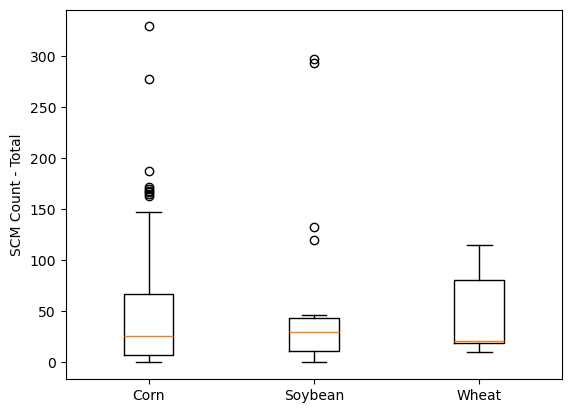

In [133]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([crop_scm_count.loc[crop_scm_count["previous_crop"] == "Corn"]["n_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Soybean"]["n_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Wheat"]["n_scm"].dropna()])
ax.set_xticklabels(["Corn", "Soybean", "Wheat"]) 
ax.set_ylabel("SCM Count - Total") 
plt.show()

In [134]:
stats.kruskal(
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Corn"]["n_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Soybean"]["n_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Wheat"]["n_scm"].dropna(),
)

KruskalResult(statistic=0.49359763225430453, pvalue=0.7812978622507157)

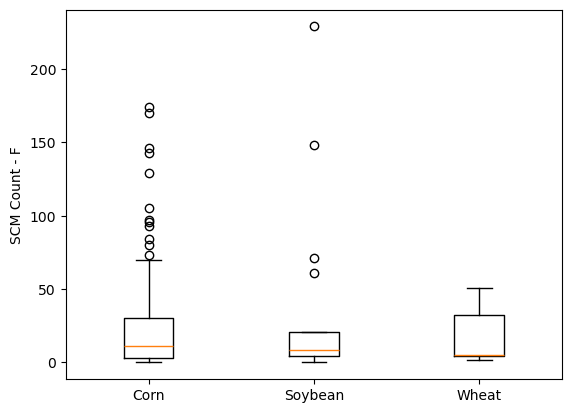

In [135]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([crop_scm_count.loc[crop_scm_count["previous_crop"] == "Corn"]["f_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Soybean"]["f_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Wheat"]["f_scm"].dropna()])
ax.set_xticklabels(["Corn", "Soybean", "Wheat"]) 
ax.set_ylabel("SCM Count - F") 
plt.show()

In [136]:
stats.kruskal(
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Corn"]["f_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Soybean"]["f_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Wheat"]["f_scm"].dropna(),
)

KruskalResult(statistic=0.009121808230896483, pvalue=0.9954494810132025)

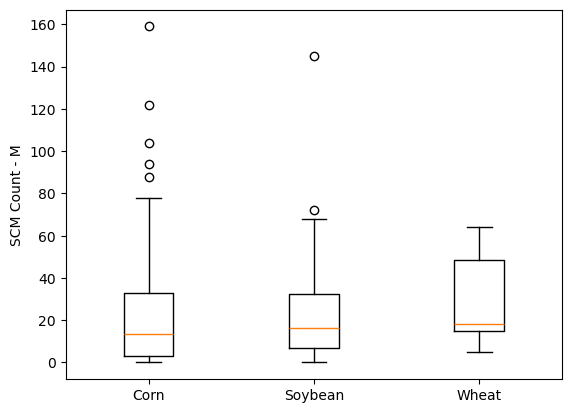

In [137]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([crop_scm_count.loc[crop_scm_count["previous_crop"] == "Corn"]["m_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Soybean"]["m_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Wheat"]["m_scm"].dropna()])
ax.set_xticklabels(["Corn", "Soybean", "Wheat"]) 
ax.set_ylabel("SCM Count - M") 
plt.show()

In [138]:
stats.kruskal(
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Corn"]["m_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Soybean"]["m_scm"].dropna(),
    crop_scm_count.loc[crop_scm_count["previous_crop"] == "Wheat"]["m_scm"].dropna(),
)

KruskalResult(statistic=2.4307297522133253, pvalue=0.29660177164800045)

In [139]:
wire_mesh_previous_crop = wire_mesh[
    [
        "previous_crop",
        "scm_seeds",
        "other_seeds",
        "total_scm_maggots",
        "total_scm_pupae",
        "number_wireworm",
        "phorid_seeds",
        "total_phorid_maggots",
        "total_phorid_pupae",
    ]
]
wire_mesh_previous_crop = wire_mesh_previous_crop.dropna()

wire_mesh_previous_crop.loc[
    wire_mesh_previous_crop["previous_crop"].str.contains("corn", case=False),
    "previous_crop",
] = "Corn"

wire_mesh_previous_crop


,previous_crop,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae
0,Corn,1.0,2.0,1.0,2,0.0,1.0,2.0,3.0
1,Corn,1.0,2.0,1.0,2,0.0,1.0,2.0,3.0
2,Corn,1.0,2.0,1.0,2,0.0,1.0,2.0,3.0
3,Corn,1.0,2.0,1.0,2,0.0,1.0,2.0,3.0
4,Corn,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1629,Corn,0.0,3.0,0.0,0,0.0,0.0,0.0,1.0
1630,Corn,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1631,Corn,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1632,Corn,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0


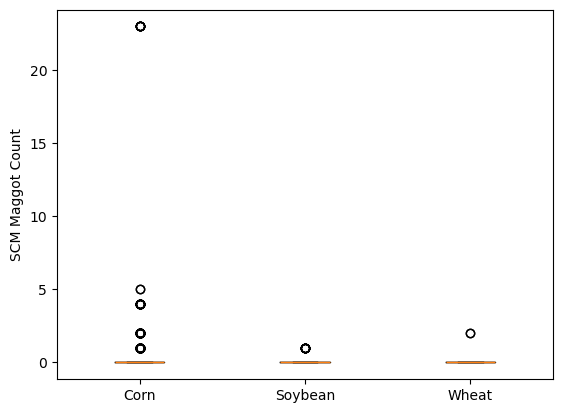

In [140]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"]["total_scm_maggots"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"]["total_scm_maggots"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"]["total_scm_maggots"].dropna()])
ax.set_xticklabels(["Corn", "Soybean", "Wheat"]) 
ax.set_ylabel("SCM Maggot Count") 
plt.show()

In [141]:
stats.kruskal(
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"]["total_scm_maggots"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"]["total_scm_maggots"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"]["total_scm_maggots"].dropna(),
)

KruskalResult(statistic=9.035679894046313, pvalue=0.010912569958005693)

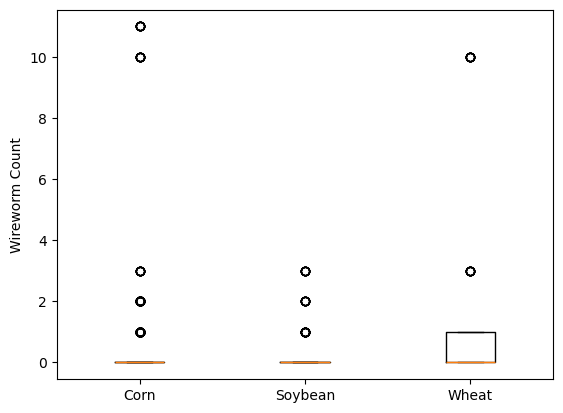

In [142]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"]["number_wireworm"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"]["number_wireworm"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"]["number_wireworm"].dropna()])
ax.set_xticklabels(["Corn", "Soybean", "Wheat"]) 
ax.set_ylabel("Wireworm Count") 
plt.show()

In [143]:
stats.kruskal(
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"]["number_wireworm"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"]["number_wireworm"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"]["number_wireworm"].dropna(),
)

KruskalResult(statistic=50.02173926093797, pvalue=1.3737804505088208e-11)

In [144]:
res = tukey_hsd(
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"][
        "number_wireworm"
    ].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"][
        "number_wireworm"
    ].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"][
        "number_wireworm"
    ].dropna(),
)

print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.092     0.697    -0.358     0.174
 (0 - 2)     -0.794     0.000    -1.101    -0.486
 (1 - 0)      0.092     0.697    -0.174     0.358
 (1 - 2)     -0.702     0.000    -1.088    -0.315
 (2 - 0)      0.794     0.000     0.486     1.101
 (2 - 1)      0.702     0.000     0.315     1.088



Group 0 = Corn  
Group 1 = Soybean  
Group 2 = Wheat  

0-2: Corn and Wheat
1-2: Soybean and Wheat

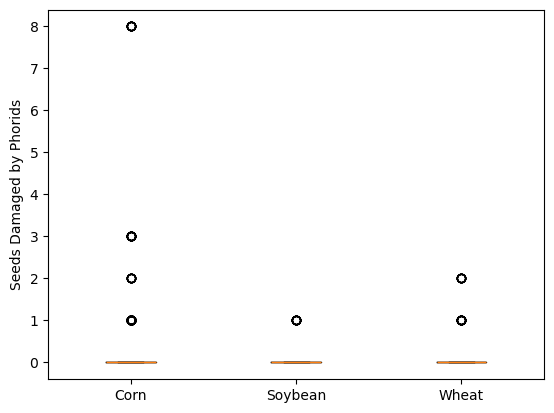

In [145]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"]["phorid_seeds"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"]["phorid_seeds"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"]["phorid_seeds"].dropna()])
ax.set_xticklabels(["Corn", "Soybean", "Wheat"]) 
ax.set_ylabel("Seeds Damaged by Phorids") 
plt.show()

In [146]:
stats.kruskal(
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"]["phorid_seeds"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"]["phorid_seeds"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"]["phorid_seeds"].dropna(),
)

KruskalResult(statistic=24.38906013248077, pvalue=5.058047259522976e-06)

In [147]:
stats.kruskal(
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"]["total_phorid_maggots"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"]["total_phorid_maggots"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"]["total_phorid_maggots"].dropna(),
)

KruskalResult(statistic=15.720481599945492, pvalue=0.0003857809641408193)

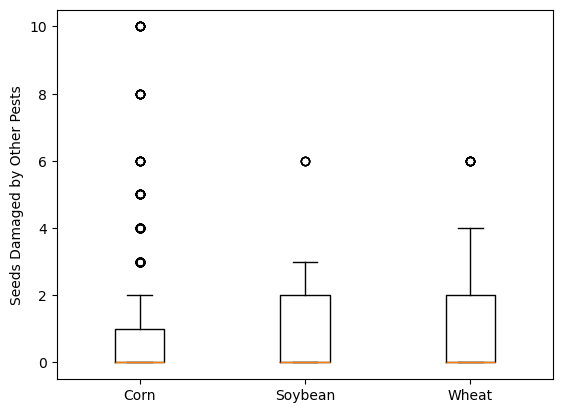

In [148]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"]["other_seeds"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"]["other_seeds"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"]["other_seeds"].dropna()])
ax.set_xticklabels(["Corn", "Soybean", "Wheat"]) 
ax.set_ylabel("Seeds Damaged by Other Pests") 
plt.show()

In [149]:
stats.kruskal(
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"]["other_seeds"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"]["other_seeds"].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"]["other_seeds"].dropna(),
)

KruskalResult(statistic=19.45110250814304, pvalue=5.97374605725746e-05)

In [150]:
res = tukey_hsd(
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Corn"][
        "other_seeds"
    ].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Soybean"][
        "other_seeds"
    ].dropna(),
    wire_mesh_previous_crop.loc[wire_mesh_previous_crop["previous_crop"] == "Wheat"][
        "other_seeds"
    ].dropna(),
)

print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.222     0.177    -0.516     0.071
 (0 - 2)     -0.390     0.019    -0.729    -0.051
 (1 - 0)      0.222     0.177    -0.071     0.516
 (1 - 2)     -0.168     0.626    -0.594     0.259
 (2 - 0)      0.390     0.019     0.051     0.729
 (2 - 1)      0.168     0.626    -0.259     0.594



In [151]:
wire_mesh_intake

,container_number,container_type,project,record_id,collection_date,notes
1525,3003,deli cup,R,DIP_CUR,4/18/23,NaN
1526,3004,deli cup,R,DIP_CUR,4/18/23,NaN
1527,3015,sushi container,R,DIP_CUR,4/18/23,NaN
1528,3016,sushi container,R,DIP_CUR,4/18/23,NaN
1529,3229,sushi container,R,DIP_CUR,5/2/23,NaN
...,...,...,...,...,...,...
2106,3670,deli cup,R,ZUE_REE,5/9/23,NaN
2107,4279,sushi container,R,ZUE_REE,5/23/23,NaN
2108,4280,sushi container,R,ZUE_REE,5/23/23,NaN
2109,4281,deli cup,R,ZUE_REE,5/25/23,NaN


In [12]:
wire_mesh_intake['collection_date'] = pd.to_datetime(
    wire_mesh_intake["collection_date"], format="%m/%d/%y"
)

In [13]:
card_id = scm_counts.merge(wire_mesh_intake, left_on=['site', 'date'], right_on=['record_id', 'collection_date'], how='left')['card_id']
card_id = card_id.astype(int).drop_duplicates()

len(card_id)
card_id
card_id.to_csv('Data/sticky_card_wire_mesh_overlapping.csv')

In [14]:
scm_counts['total_m'] = scm_counts['n_scm_i_m'] + scm_counts['n_scm_o_m']
scm_counts['total_f'] = scm_counts['n_scm_i_f'] + scm_counts['n_scm_o_f']
scm_counts['total_scm'] = scm_counts['n_scm_i_m'] + scm_counts['n_scm_o_m'] + scm_counts['n_scm_i_f'] + scm_counts['n_scm_o_f']

In [15]:
scm_counts

,card_id,data_collector,site,date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,week,total_m,total_f,total_scm
0,2245,Janice Degni,DEG_DIE_HILL,2023-04-21,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN
1,2246,Janice Degni,DEG_DIE_HILL,2023-04-21,16.0,10.0,7.0,5.0,0.0,0.0,16,23.0,15.0,38.0
2,2265,Janice Degni,DEG_DIE_HILL,2023-04-27,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN
3,2266,Janice Degni,DEG_DIE_HILL,2023-04-27,43.0,9.0,51.0,12.0,0.0,0.0,17,94.0,21.0,115.0
4,2373,Janice Degni,DEG_DIE_HILL,2023-05-04,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,2384,Marion Zuefle,ZUE_REE,2023-05-02,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN
574,2417,Marion Zuefle,ZUE_REE,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN
575,2418,Marion Zuefle,ZUE_REE,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN
576,2551,Marion Zuefle,ZUE_REE,2023-05-17,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN


In [16]:
wire_mesh

,id,container_number,project,seed_type,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,notes,container_type,collection_date,record_id
2,3,3011,R,Bean,8.0,1.0,2.0,1.0,2,0.0,1.0,2.0,3.0,NaN,deli cup,2023-04-17,GAB_ALL
5,6,3009,R,Bean,10.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-04-17,GAB_STE
8,9,3068,R,Bean,8.0,0.0,0.0,0.0,5,1.0,2.0,7.0,9.0,NaN,deli cup,2023-04-18,SMI_JOH_2
11,12,3067,R,Bean,10.0,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-04-18,SMI_JOH_2
14,15,3010,R,Bean,10.0,0.0,1.0,0.0,0,0.0,0.0,0.0,19.0,NaN,deli cup,2023-04-17,GAB_STE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,5184,5033,R,Corn,10.0,0.0,3.0,0.0,0,0.0,0.0,0.0,1.0,NaN,deli cup,2023-06-06,DIP_FLE
836,5229,5034,R,Corn,10.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-06-06,DIP_FLE
839,5403,4214,R,Corn,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-05-19,WIS_KEN
842,5433,5110,R,Corn,10.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,NaN,deli cup,2023-06-12,SMI_CAN


In [17]:
adult_and_risk = scm_counts.merge(wire_mesh, left_on=['date', 'site'], right_on=['collection_date', 'record_id'], how='left')
adult_and_risk

,card_id,data_collector,site,date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,...,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,notes,container_type,collection_date,record_id
0,2245,Janice Degni,DEG_DIE_HILL,2023-04-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,2246,Janice Degni,DEG_DIE_HILL,2023-04-21,16.0,10.0,7.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,2265,Janice Degni,DEG_DIE_HILL,2023-04-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,2266,Janice Degni,DEG_DIE_HILL,2023-04-27,43.0,9.0,51.0,12.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,2373,Janice Degni,DEG_DIE_HILL,2023-05-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,2418,Marion Zuefle,ZUE_REE,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-05-09,ZUE_REE
1055,2418,Marion Zuefle,ZUE_REE,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-05-09,ZUE_REE
1056,2418,Marion Zuefle,ZUE_REE,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-05-09,ZUE_REE
1057,2551,Marion Zuefle,ZUE_REE,2023-05-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [18]:
adult_and_risk.drop_duplicates('card_id')

,card_id,data_collector,site,date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,...,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,notes,container_type,collection_date,record_id
0,2245,Janice Degni,DEG_DIE_HILL,2023-04-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,2246,Janice Degni,DEG_DIE_HILL,2023-04-21,16.0,10.0,7.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,2265,Janice Degni,DEG_DIE_HILL,2023-04-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,2266,Janice Degni,DEG_DIE_HILL,2023-04-27,43.0,9.0,51.0,12.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,2373,Janice Degni,DEG_DIE_HILL,2023-05-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2384,Marion Zuefle,ZUE_REE,2023-05-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1049,2417,Marion Zuefle,ZUE_REE,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-05-09,ZUE_REE
1053,2418,Marion Zuefle,ZUE_REE,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,deli cup,2023-05-09,ZUE_REE
1057,2551,Marion Zuefle,ZUE_REE,2023-05-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [19]:
adult_and_risk.columns

Index(['card_id', 'data_collector', 'site', 'date', 'n_scm_i_m', 'n_scm_i_f',
       'n_scm_o_m', 'n_scm_o_f', 'n_d_florilega_i', 'n_d_florilega_o', 'week',
       'total_m', 'total_f', 'total_scm', 'id', 'container_number', 'project',
       'seed_type', 'number_seeds', 'scm_seeds', 'other_seeds',
       'total_scm_maggots', 'total_scm_pupae', 'number_wireworm',
       'phorid_seeds', 'total_phorid_maggots', 'total_phorid_pupae', 'notes',
       'container_type', 'collection_date', 'record_id'],
      dtype='object')

In [20]:
adult_and_risk = adult_and_risk.drop(['data_collector', 'site', 'n_scm_i_m', 'n_scm_i_f', 'n_scm_o_m', 'n_scm_o_f', 'project', 'notes', 'container_type'], axis=1)
adult_and_risk

,card_id,date,n_d_florilega_i,n_d_florilega_o,week,total_m,total_f,total_scm,id,container_number,...,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,collection_date,record_id
0,2245,2023-04-21,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,2246,2023-04-21,0.0,0.0,16,23.0,15.0,38.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,2265,2023-04-27,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,2266,2023-04-27,0.0,0.0,17,94.0,21.0,115.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,2373,2023-05-04,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,2418,2023-05-09,NaN,NaN,19,NaN,NaN,NaN,1209.0,3669.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2023-05-09,ZUE_REE
1055,2418,2023-05-09,NaN,NaN,19,NaN,NaN,NaN,1206.0,3670.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-05-09,ZUE_REE
1056,2418,2023-05-09,NaN,NaN,19,NaN,NaN,NaN,1209.0,3669.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2023-05-09,ZUE_REE
1057,2551,2023-05-17,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [41]:
adult_and_risk_drop_na = adult_and_risk.dropna(subset=['total_scm', 'total_scm_maggots'])
d = np.polyfit(adult_and_risk_drop_na['total_scm'],adult_and_risk_drop_na['total_scm_maggots'],1)
f = np.poly1d(d)

adult_and_risk_drop_na.insert(0, 'regression',f(adult_and_risk_drop_na['total_scm_maggots']))


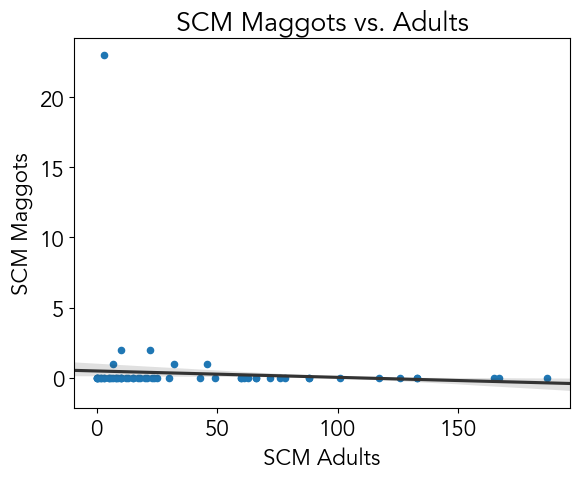

In [67]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.rcParams.update({'font.size': 16})

ax = adult_and_risk_drop_na.drop_duplicates('card_id').plot.scatter(x = 'total_scm', y = 'total_scm_maggots')

sns.regplot(
    data=adult_and_risk_drop_na, x="total_scm", y="total_scm_maggots",
    scatter=False, truncate=False, order=1, color=".2",
)

plt.xlabel('SCM Adults')
plt.ylabel('SCM Maggots')
plt.title('SCM Maggots vs. Adults')
plt.show()

In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(adult_and_risk_drop_na['total_scm'],adult_and_risk_drop_na['total_scm_maggots'])
slope, intercept, r_value, p_value, std_err

(-0.0045385739158049524,
 0.4892172725261955,
 -0.09901102943840641,
 0.14324750817358384,
 0.003089358816650631)

In [22]:
adult_and_risk.drop_duplicates('card_id').loc[adult_and_risk['total_scm_maggots'] > 15]

,card_id,date,n_d_florilega_i,n_d_florilega_o,week,total_m,total_f,total_scm,id,container_number,...,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,collection_date,record_id
743,2279,2023-05-01,NaN,NaN,18,NaN,NaN,NaN,207.0,3219.0,...,4.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,2023-05-01,SMI_KEL
747,2280,2023-05-01,0.0,0.0,18,1.0,2.0,3.0,207.0,3219.0,...,4.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,2023-05-01,SMI_KEL


In [23]:
wire_mesh_intake

,container_number,container_type,project,record_id,collection_date,notes
1525,3003,deli cup,R,DIP_CUR,2023-04-18,NaN
1526,3004,deli cup,R,DIP_CUR,2023-04-18,NaN
1527,3015,sushi container,R,DIP_CUR,2023-04-18,NaN
1528,3016,sushi container,R,DIP_CUR,2023-04-18,NaN
1529,3229,sushi container,R,DIP_CUR,2023-05-02,NaN
...,...,...,...,...,...,...
2106,3670,deli cup,R,ZUE_REE,2023-05-09,NaN
2107,4279,sushi container,R,ZUE_REE,2023-05-23,NaN
2108,4280,sushi container,R,ZUE_REE,2023-05-23,NaN
2109,4281,deli cup,R,ZUE_REE,2023-05-25,NaN


In [26]:
germination

,container_nr,date_collected,seed_type,date_1st_measure,nr_seeds_germinated_1st_measure,date_2nd_measure,nr_seeds_germinated_2nd_measure,nr_seeds_with_root_only,nr_seeds_with_shoot_only,nr_seeds_with_both_root_and_shoot,nr_seeds_not_germinated,dry_aboveground_biomass_of_seedlings,dry_belowground_biomass_of_seedlings
0,3013,4/18/23,corn,4/19/23,5,4/27/23,7.0,0.0,0.0,7.0,3.0,NaN,NaN
1,3014,4/18/23,lima,4/19/23,0,4/27/23,0.0,0.0,0.0,0.0,10.0,NaN,NaN
2,3015,4/18/23,lima,4/19/23,0,4/27/23,0.0,0.0,0.0,0.0,10.0,NaN,NaN
3,3016,4/18/23,corn,4/19/23,8,4/27/23,10.0,0.0,0.0,10.0,0.0,NaN,NaN
4,3017,4/18/23,corn,4/19/23,6,4/27/23,6.0,0.0,1.0,5.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5138,6/27/23,corn,7/3/23,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,4783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.51086,0.74461
298,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53330,0.07336
299,4043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.54062,0.35735


In [27]:
germination = wire_mesh_intake.merge(germination, left_on=['container_number'], right_on=['container_nr'], how='left')
germination

,container_number,container_type,project,record_id,collection_date,notes,container_nr,date_collected,seed_type,date_1st_measure,nr_seeds_germinated_1st_measure,date_2nd_measure,nr_seeds_germinated_2nd_measure,nr_seeds_with_root_only,nr_seeds_with_shoot_only,nr_seeds_with_both_root_and_shoot,nr_seeds_not_germinated,dry_aboveground_biomass_of_seedlings,dry_belowground_biomass_of_seedlings
0,3003,deli cup,R,DIP_CUR,2023-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3004,deli cup,R,DIP_CUR,2023-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,4/18/23,lima,4/19/23,0,4/27/23,0.0,0.0,0.0,0.0,10.0,NaN,NaN
3,3016,sushi container,R,DIP_CUR,2023-04-18,NaN,3016.0,4/18/23,corn,4/19/23,8,4/27/23,10.0,0.0,0.0,10.0,0.0,NaN,NaN
4,3229,sushi container,R,DIP_CUR,2023-05-02,NaN,3229.0,5/2/23,lima,5/3/23,0,5/9/23,0.0,0.0,0.0,0.0,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,3670,deli cup,R,ZUE_REE,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583,4279,sushi container,R,ZUE_REE,2023-05-23,NaN,4279.0,5/23/23,lima,5/25/23,0,6/12/23,0.0,0.0,0.0,0.0,10.0,NaN,NaN
584,4280,sushi container,R,ZUE_REE,2023-05-23,NaN,4280.0,5/23/23,corn,5/25/23,10,6/12/23,10.0,0.0,0.0,10.0,0.0,0.09028,1.62157
585,4281,deli cup,R,ZUE_REE,2023-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
germination["date_collected"] = pd.to_datetime(germination["date_collected"], format="%m/%d/%y")
germination.columns

Index(['container_number', 'container_type', 'project', 'record_id',
       'collection_date', 'notes', 'container_nr', 'date_collected',
       'seed_type', 'date_1st_measure', 'nr_seeds_germinated_1st_measure',
       'date_2nd_measure', 'nr_seeds_germinated_2nd_measure',
       'nr_seeds_with_root_only', 'nr_seeds_with_shoot_only',
       'nr_seeds_with_both_root_and_shoot', 'nr_seeds_not_germinated',
       'dry_aboveground_biomass_of_seedlings',
       'dry_belowground_biomass_of_seedlings'],
      dtype='object')

In [29]:
wire_mesh.columns

Index(['id', 'container_number', 'project', 'seed_type', 'number_seeds',
       'scm_seeds', 'other_seeds', 'total_scm_maggots', 'total_scm_pupae',
       'number_wireworm', 'phorid_seeds', 'total_phorid_maggots',
       'total_phorid_pupae', 'notes', 'container_type', 'collection_date',
       'record_id'],
      dtype='object')

In [30]:
germination_wire_mesh = germination.merge(wire_mesh[['record_id','seed_type', 'number_seeds',
       'scm_seeds', 'other_seeds', 'total_scm_maggots', 'total_scm_pupae',
       'number_wireworm', 'phorid_seeds', 'total_phorid_maggots',
       'total_phorid_pupae', 'collection_date']], left_on=['record_id', 'date_collected'], right_on=['record_id', 'collection_date'], how='left')
germination_wire_mesh

,container_number,container_type,project,record_id,collection_date_x,notes,container_nr,date_collected,seed_type_x,date_1st_measure,...,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,collection_date_y
0,3003,deli cup,R,DIP_CUR,2023-04-18,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,3004,deli cup,R,DIP_CUR,2023-04-18,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,4/19/23,...,5.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,2023-04-18
3,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,4/19/23,...,9.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2023-04-18
4,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,4/19/23,...,5.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,2023-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,3670,deli cup,R,ZUE_REE,2023-05-09,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1370,4279,sushi container,R,ZUE_REE,2023-05-23,NaN,4279.0,2023-05-23,lima,5/25/23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1371,4280,sushi container,R,ZUE_REE,2023-05-23,NaN,4280.0,2023-05-23,corn,5/25/23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1372,4281,deli cup,R,ZUE_REE,2023-05-25,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [31]:
germination_wire_mesh.columns

Index(['container_number', 'container_type', 'project', 'record_id',
       'collection_date_x', 'notes', 'container_nr', 'date_collected',
       'seed_type_x', 'date_1st_measure', 'nr_seeds_germinated_1st_measure',
       'date_2nd_measure', 'nr_seeds_germinated_2nd_measure',
       'nr_seeds_with_root_only', 'nr_seeds_with_shoot_only',
       'nr_seeds_with_both_root_and_shoot', 'nr_seeds_not_germinated',
       'dry_aboveground_biomass_of_seedlings',
       'dry_belowground_biomass_of_seedlings', 'seed_type_y', 'number_seeds',
       'scm_seeds', 'other_seeds', 'total_scm_maggots', 'total_scm_pupae',
       'number_wireworm', 'phorid_seeds', 'total_phorid_maggots',
       'total_phorid_pupae', 'collection_date_y'],
      dtype='object')

In [32]:
germination_wire_mesh = germination_wire_mesh[pd.to_numeric(germination_wire_mesh['nr_seeds_germinated_1st_measure'], errors='coerce').notnull()]
germination_wire_mesh['nr_seeds_germinated_1st_measure'] = germination_wire_mesh['nr_seeds_germinated_1st_measure'].astype('int')
germination_wire_mesh = germination_wire_mesh.dropna(subset = ['nr_seeds_germinated_1st_measure', 'total_scm_maggots'])
germination_wire_mesh

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_97924/2622140312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germination_wire_mesh['nr_seeds_germinated_1st_measure'] = germination_wire_mesh['nr_seeds_germinated_1st_measure'].astype('int')


,container_number,container_type,project,record_id,collection_date_x,notes,container_nr,date_collected,seed_type_x,date_1st_measure,...,number_seeds,scm_seeds,other_seeds,total_scm_maggots,total_scm_pupae,number_wireworm,phorid_seeds,total_phorid_maggots,total_phorid_pupae,collection_date_y
2,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,4/19/23,...,5.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,2023-04-18
3,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,4/19/23,...,9.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2023-04-18
4,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,4/19/23,...,5.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,2023-04-18
5,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,4/19/23,...,9.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2023-04-18
6,3016,sushi container,R,DIP_CUR,2023-04-18,NaN,3016.0,2023-04-18,corn,4/19/23,...,5.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,2023-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,3630,sushi container,R,ZUE_REE,2023-05-09,NaN,3630.0,2023-05-09,corn,5/12/23,...,8.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2023-05-09
1364,3631,sushi container,R,ZUE_REE,2023-05-09,NaN,3631.0,2023-05-09,lima,5/12/23,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-05-09
1365,3631,sushi container,R,ZUE_REE,2023-05-09,NaN,3631.0,2023-05-09,lima,5/12/23,...,8.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2023-05-09
1366,3631,sushi container,R,ZUE_REE,2023-05-09,NaN,3631.0,2023-05-09,lima,5/12/23,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-05-09


In [49]:
germination_wire_mesh_drop_na = germination_wire_mesh.dropna(subset=['total_scm_maggots', 'nr_seeds_germinated_1st_measure'])
d = np.polyfit(germination_wire_mesh_drop_na['total_scm_maggots'],germination_wire_mesh_drop_na['nr_seeds_germinated_1st_measure'],1)
f = np.poly1d(d)

germination_wire_mesh_drop_na.insert(0, 'regression',f(germination_wire_mesh_drop_na['nr_seeds_germinated_1st_measure']))


In [56]:
corr, _ = pearsonr(germination_wire_mesh_drop_na['total_scm_maggots'],germination_wire_mesh_drop_na['nr_seeds_germinated_1st_measure'])
corr

-0.0951613317010766

In [63]:
slope, intercept, r_value, p_value, std_err = stats.linregress(germination_wire_mesh_drop_na['total_scm_maggots'],germination_wire_mesh_drop_na['nr_seeds_germinated_1st_measure'])
slope, intercept, r_value, p_value, std_err

(-0.1820880845672361,
 4.706423857340066,
 -0.0951613317010767,
 0.04134417833029572,
 0.08900469248687239)

/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

Text(0.5, 1.0, 'Seeds Germinated vs. SCM Maggots')

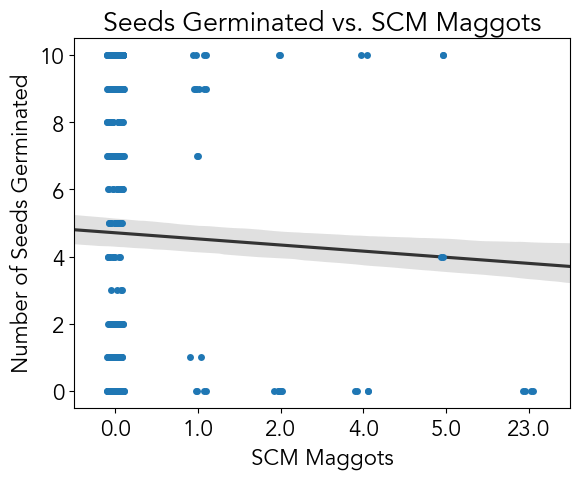

In [87]:
ax = sns.stripplot(x = 'total_scm_maggots', y = 'nr_seeds_germinated_1st_measure', data=germination_wire_mesh_drop_na)

sns.regplot(
    data=germination_wire_mesh_drop_na, x="total_scm_maggots", y="nr_seeds_germinated_1st_measure",
    scatter=False, truncate=False, order=1, color=".2",
)

plt.xlabel('SCM Maggots')
plt.ylabel('Number of Seeds Germinated')
plt.title('Seeds Germinated vs. SCM Maggots')


/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Seeds Germinated vs. SCM Maggots')

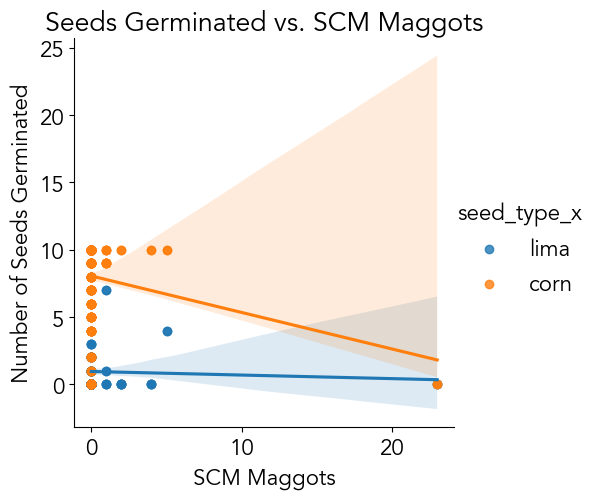

In [91]:
sns.lmplot(data=germination_wire_mesh_drop_na, x="total_scm_maggots", y="nr_seeds_germinated_1st_measure", hue="seed_type_x")

plt.xlabel('SCM Maggots')
plt.ylabel('Number of Seeds Germinated')
plt.title('Seeds Germinated vs. SCM Maggots')


In [119]:
merged_df = germination_wire_mesh_drop_na.merge(
    adult_and_risk_drop_na,
    left_on=[
        "record_id",
        "date_collected",
        "number_seeds",
        "scm_seeds",
        "other_seeds",
        "total_scm_maggots",
        "total_scm_pupae",
        "number_wireworm",
        "phorid_seeds",
        "total_phorid_maggots",
        "total_phorid_pupae",
    ],
    right_on=[
        "record_id",
        "collection_date",
        "number_seeds",
        "scm_seeds",
        "other_seeds",
        "total_scm_maggots",
        "total_scm_pupae",
        "number_wireworm",
        "phorid_seeds",
        "total_phorid_maggots",
        "total_phorid_pupae",
    ],
    how="left",
)

In [120]:
merged_df = merged_df.dropna(subset=['total_scm', 'nr_seeds_germinated_1st_measure'])
merged_df

,regression_x,container_number_x,container_type,project,record_id,collection_date_x,notes,container_nr,date_collected,seed_type_x,...,n_d_florilega_i,n_d_florilega_o,week,total_m,total_f,total_scm,id,container_number_y,seed_type,collection_date
0,4.706424,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,...,0.0,0.0,16.0,25.0,35.0,60.0,21.0,3003.0,Bean,2023-04-18
1,4.706424,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,...,0.0,0.0,16.0,25.0,35.0,60.0,21.0,3003.0,Corn,2023-04-18
2,4.706424,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,...,0.0,0.0,16.0,25.0,35.0,60.0,27.0,3004.0,Bean,2023-04-18
3,4.706424,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,...,0.0,0.0,16.0,25.0,35.0,60.0,27.0,3004.0,Corn,2023-04-18
4,4.706424,3015,sushi container,R,DIP_CUR,2023-04-18,NaN,3015.0,2023-04-18,lima,...,0.0,0.0,16.0,25.0,35.0,60.0,21.0,3003.0,Bean,2023-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2.885543,3086,sushi container,R,STA_WIL,2023-04-20,NaN,3086.0,2023-04-20,corn,...,3.0,0.0,16.0,23.0,7.0,30.0,189.0,3080.0,Corn,2023-04-20
748,2.885543,3086,sushi container,R,STA_WIL,2023-04-20,NaN,3086.0,2023-04-20,corn,...,3.0,0.0,16.0,23.0,7.0,30.0,183.0,3079.0,Bean,2023-04-20
749,2.885543,3086,sushi container,R,STA_WIL,2023-04-20,NaN,3086.0,2023-04-20,corn,...,3.0,0.0,16.0,23.0,7.0,30.0,183.0,3079.0,Corn,2023-04-20
750,2.885543,3086,sushi container,R,STA_WIL,2023-04-20,NaN,3086.0,2023-04-20,corn,...,3.0,0.0,16.0,23.0,7.0,30.0,189.0,3080.0,Bean,2023-04-20


In [124]:
max(merged_df['total_scm'])

187.0

Text(0.5, 1.0, 'Seeds Germinated vs. SCM Adults')

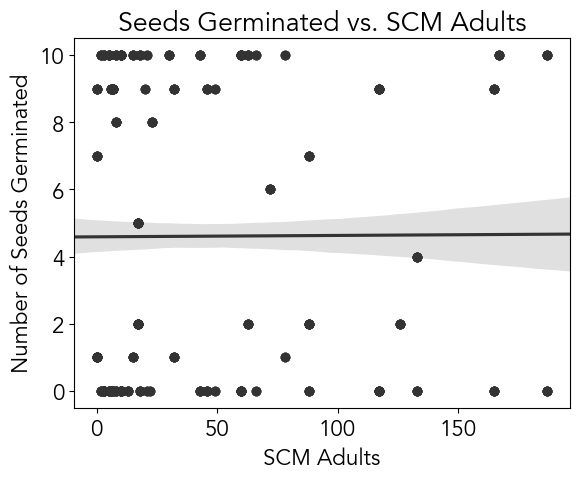

In [135]:
#ax = sns.stripplot(x = 'total_scm', y = 'nr_seeds_germinated_1st_measure', data=merged_df)

ax = sns.regplot(
    data=merged_df, x="total_scm", y="nr_seeds_germinated_1st_measure",
    scatter=True, truncate=False, order=1, color=".2",
)

#ax.set_xticks(np.arange(0, 200, 10))
#ax.xaxis


plt.xlabel('SCM Adults')
plt.ylabel('Number of Seeds Germinated')
plt.title('Seeds Germinated vs. SCM Adults')


In [136]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['total_scm'],merged_df['nr_seeds_germinated_1st_measure'])
slope, intercept, r_value, p_value, std_err

(0.0004115678870704692,
 4.586574726601577,
 0.004713005403278764,
 0.9076738120495026,
 0.003547336667429014)